# TRISEP ML tutorial part II: Building your first fully connected network and a CNN 

## Building a simple fully connected network (a Multi-Layer Perceptron)

Let's set up the paths and make a dataset again:

In [12]:
!ls /data/solution

engine.py


In [13]:
!cp /data/solution/engine.py ../utils/engine.py

../utils/engine.py


In [1]:
import os,sys
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from utils.data_handling import WCH5Dataset

Now Let's make our model. We'll talk about 
  - model parameters
  - inputs and the forward method
  - Modules containing modules
  - Sequential Module  
  Lets open [simpleMLP](/edit/models/simpleMLP.py)

In [3]:
from models.simpleMLP import SimpleMLP

In [4]:
model_MLP=SimpleMLP(num_classes=3)

Let's look at the parameters:

In [5]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: fc1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc3.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: fc5.weight, type: <class 'torch.nn.parameter.Parameter'>, p

As we can see by default the parameters have `requires_grad` set - i.e. we will be able to obtain gradient of the loss function with respect to these parameters.

Let's quickly look at the [source](https://pytorch.org/docs/stable/_modules/torch/nn/modules/linear.html#Linear) for the linear module

The parameters descend from the `Tensor` class. When `Parameter` object is instantiated as a member of a `Module` object class the parameter is added to `Module`s list of parameters automatically. This list and values are captured in the 'state dictionary' of a module:

In [6]:
model_MLP.state_dict()

OrderedDict([('fc1.weight',
              tensor([[ 0.0044,  0.0063,  0.0038,  ..., -0.0036,  0.0037, -0.0014],
                      [-0.0042,  0.0039, -0.0020,  ..., -0.0007, -0.0015, -0.0037],
                      [-0.0042,  0.0057, -0.0033,  ..., -0.0038, -0.0048,  0.0044],
                      ...,
                      [ 0.0045,  0.0057, -0.0055,  ...,  0.0057,  0.0062,  0.0040],
                      [-0.0044, -0.0011, -0.0002,  ..., -0.0004, -0.0006, -0.0037],
                      [ 0.0061,  0.0030, -0.0060,  ..., -0.0003, -0.0026,  0.0027]])),
             ('fc1.bias',
              tensor([ 0.0035, -0.0039,  0.0063,  ..., -0.0058, -0.0052,  0.0028])),
             ('fc2.weight',
              tensor([[-0.0073, -0.0036, -0.0093,  ..., -0.0039,  0.0080,  0.0024],
                      [ 0.0024, -0.0071, -0.0047,  ..., -0.0079,  0.0045,  0.0032],
                      [ 0.0101, -0.0063, -0.0036,  ...,  0.0029, -0.0045,  0.0098],
                      ...,
                    

Now let's look at sequential version

In [7]:
from models.simpleMLP import SimpleMLPSEQ
model_MLPSEQ=SimpleMLPSEQ(num_classes=3)

In [8]:
for name, param in model_MLPSEQ.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: _sequence.0.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.0.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.2.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.4.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: _sequence.6.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parame

In [9]:
print(model_MLPSEQ.state_dict())

OrderedDict([('_sequence.0.weight', tensor([[-5.4354e-03, -1.9206e-03, -5.0261e-03,  ...,  8.8078e-04,
         -1.0787e-03, -4.3935e-03],
        [ 4.6720e-03,  6.3864e-03,  3.3653e-03,  ..., -4.0648e-03,
         -3.8435e-03,  4.8310e-03],
        [-1.9844e-03, -3.3759e-03,  2.8518e-03,  ..., -3.1375e-03,
         -4.6980e-03,  1.0122e-03],
        ...,
        [ 5.2157e-03, -2.0317e-03, -6.7737e-04,  ..., -5.0847e-03,
          8.5542e-05, -1.6256e-03],
        [-2.7779e-03, -3.5305e-03,  4.4452e-03,  ..., -4.5816e-03,
         -4.1776e-03, -1.0558e-03],
        [ 5.4984e-03, -1.0391e-03,  4.0156e-03,  ..., -2.8600e-03,
          3.8283e-03, -7.7623e-04]])), ('_sequence.0.bias', tensor([ 0.0045,  0.0030,  0.0047,  ..., -0.0054, -0.0005, -0.0052])), ('_sequence.2.weight', tensor([[-0.0007,  0.0012, -0.0082,  ..., -0.0079,  0.0027,  0.0079],
        [-0.0068, -0.0081, -0.0011,  ..., -0.0075,  0.0028,  0.0026],
        [ 0.0069, -0.0059,  0.0101,  ...,  0.0010,  0.0081,  0.0069],
     

As we can see the parameters look similar but have different names

## Training a model

First let's make a dataset object

In [11]:

dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",reduced_dataset_size=50000,val_split=0.1,test_split=0.1)

Reduced size: 50000


Let's make a dataloader and grab a first batch

In [12]:
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

train_dldr=DataLoader(dset,
                      batch_size=32,
                      shuffle=False,
                      sampler=SubsetRandomSampler(dset.train_indices))
train_iter=iter(train_dldr)

In [13]:
batch0=next(train_iter)

In [14]:
data=batch0[0]
labels=batch0[1]

Now compute the model output on the data

In [ ]:
model_out=model_MLP(data)

Now we have model's predictions and we above got 'true' labels from the dataset, so we can now compute the loss - CrossEntropyLoss is the apropropriate one to use here. We will use `CrossEntropyLoss` from `torch.nn` - btw it is also a `Module`. First create it:

In [16]:
from torch.nn import CrossEntropyLoss
loss_module=CrossEntropyLoss()

Now evaluate the loss. 

In [17]:
loss_tensor=loss_module(model_out,labels)

This was a 'forward pass'. We should now have a computational graph available - let's plot it for the kicks...

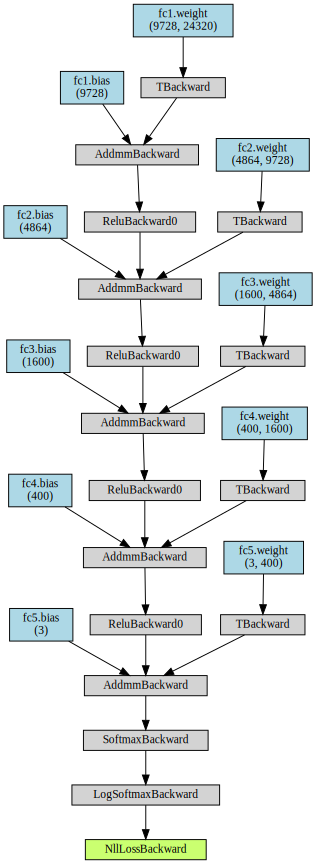

In [18]:
from torchviz import make_dot
make_dot(loss_tensor,params=dict(model_MLP.named_parameters()))

Before we calculate the gradients - let's check what they are now...

In [19]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: None
name of a parameter: fc1.bias, gradient: None
name of a parameter: fc2.weight, gradient: None
name of a parameter: fc2.bias, gradient: None
name of a parameter: fc3.weight, gradient: None
name of a parameter: fc3.bias, gradient: None
name of a parameter: fc4.weight, gradient: None
name of a parameter: fc4.bias, gradient: None
name of a parameter: fc5.weight, gradient: None
name of a parameter: fc5.bias, gradient: None


No wonder - let's calculate them

In [20]:
loss_tensor.backward()

In [21]:
for name, param in model_MLP.named_parameters():
    print("name of a parameter: {}, gradient: {}".
          format(name, param.grad))

name of a parameter: fc1.weight, gradient: tensor([[-1.5684e-06,  5.9746e-11,  3.4718e-07,  ...,  2.4550e-03,
         -1.6539e-03, -4.1298e-04],
        [ 5.3746e-07,  0.0000e+00,  8.5318e-11,  ...,  2.3912e-03,
          1.9894e-04,  8.1822e-05],
        [-1.5719e-07,  7.4166e-10, -5.7144e-07,  ...,  2.7270e-04,
          1.0943e-03,  4.8259e-04],
        ...,
        [-2.6471e-07,  0.0000e+00,  0.0000e+00,  ..., -2.5758e-03,
         -1.7969e-03,  0.0000e+00],
        [-6.1928e-07,  4.6522e-10, -7.6810e-07,  ..., -4.4953e-03,
         -3.3545e-03,  9.6505e-04],
        [ 0.0000e+00,  0.0000e+00, -1.3358e-06,  ...,  8.1731e-04,
          1.6626e-03, -4.3931e-04]])
name of a parameter: fc1.bias, gradient: tensor([-9.1133e-06,  2.2965e-06,  2.8578e-06,  ..., -4.3058e-06,
        -1.7077e-05,  9.5642e-06])
name of a parameter: fc2.weight, gradient: tensor([[-7.7098e-06, -2.7727e-05,  9.6719e-05,  ..., -7.3736e-06,
          9.5171e-05,  6.1517e-07],
        [-1.7978e-03, -4.7789e-04, -3

All we have to do now is subtract the gradient of a given parameter from the parameter tensor itself and do it for all parameters of the model - that should decrease the loss. Normally the gradient is multiplied by a learning rate parameter $\lambda$ so we don't go too far in the loss landscape

In [22]:
lr=0.0001
for param in model_MLP.parameters():
    param.data.add_(-lr*param.grad.data)

call to backward **accumulates** gradients - so we also need to zero the gradient tensors if we want to keep going

In [23]:
for param in model_MLP.parameters():
    param.grad.data.zero_()

There is a much simpler way of doing this - we can use the pytorch [optim](https://pytorch.org/docs/stable/optim.html) classes. This allows us to easily use more advanced optimization options (like momentum or adaptive optimizers like [Adam](https://arxiv.org/abs/1412.6980)):

In [24]:
from torch import optim
optimizer = optim.SGD(model_MLP.parameters(), lr=0.0001)

Lets get a new batch of events

In [25]:
batch1=next(train_iter)

In [26]:
data=batch1[0]
labels=batch1[1]

In [27]:
model_out=model_MLP(data)
loss_tensor=loss_module(model_out,labels)
loss_tensor.backward()
optimizer.step()

We could just put the code above in a loop and be done with it, but the usual practice would be to wrap this functionality in a training object. Here we'll use the [engine](/edit/utils/engine.py) class. Let's examine it. We'll talk about:
  1. Implementation of the training loop
  2. Evaluation on validation set and training and test modes.
  3. Turning evaluation of gradients on and off.
  4. Saving and retrieving the model and optimizer state.

In [8]:
from utils.engine import Engine

Let's first create a configuration object -we'll use this to set up our training engine

In [3]:
class CONFIG:
    pass
config=CONFIG()
config.batch_size_test = 1024
config.batch_size_train = 32
config.batch_size_val = 2048
config.lr=0.001
config.device = 'gpu'
config.num_workers_train=3
config.num_workers_val=2
config.num_workers_test=2
config.dump_path = '../model_state_dumps'


In [30]:
engine=Engine(model_MLP,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190801_003222/


In [31]:
print(vars(config))

{'batch_size_test': 1024, 'batch_size_train': 32, 'batch_size_val': 2048, 'lr': 0.001, 'device': 'gpu', 'num_workers_train': 3, 'num_workers_val': 2, 'num_workers_test': 2, 'dump_path': '../model_state_dumps'}


In [32]:
%%time
engine.train(epochs=2.5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-08-01 00:32:22
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.170 ... Validation Accuracy 0.334
Saved checkpoint as: ../model_state_dumps/20190801_003222/SimpleMLP.pth
best validation loss so far!: 1.170274257659912
Saved checkpoint as: ../model_state_dumps/20190801_003222/SimpleMLPBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.169 ... Accuracy 0.375
... Iteration 11 ... Epoch 0.01 ... Loss 1.090 ... Accuracy 0.469
... Iteration 21 ... Epoch 0.02 ... Loss 1.181 ... Accuracy 0.375
... Iteration 31 ... Epoch 0.02 ... Loss 1.305 ... Accuracy 0.250
... Iteration 41 ... Epoch 0.03 ... Loss 1.176 ... Accuracy 0.375
... Iteration 51 ... Epoch 0.04 ... Loss 1.179 ... Accuracy 0.375
... Iteration 61 ... Epoch 0.05 ... Loss 1.302 ... Accuracy 0.250
... Iteration 71 ... Epoch 0.06 ... Loss 1.178 ... Accuracy 0.375
... Iteration 81 ... Epoch 0.06 ... Loss 1.054 ... Accuracy 0.500
... Iteration 91 ... Epoch 0.07 ... Loss 1.239 ... Accuracy 0.312
... Iteration 100 .

... Iteration 951 ... Epoch 0.76 ... Loss 1.239 ... Accuracy 0.312
... Iteration 961 ... Epoch 0.77 ... Loss 1.083 ... Accuracy 0.469
... Iteration 971 ... Epoch 0.78 ... Loss 1.239 ... Accuracy 0.312
... Iteration 981 ... Epoch 0.78 ... Loss 1.208 ... Accuracy 0.344
... Iteration 991 ... Epoch 0.79 ... Loss 1.239 ... Accuracy 0.312
... Iteration 1000 ... Epoch 0.80 ... Validation Loss 1.222 ... Validation Accuracy 0.330
Saved checkpoint as: ../model_state_dumps/20190801_003222/SimpleMLP.pth
... Iteration 1001 ... Epoch 0.80 ... Loss 1.303 ... Accuracy 0.250
... Iteration 1011 ... Epoch 0.81 ... Loss 1.176 ... Accuracy 0.375
... Iteration 1021 ... Epoch 0.82 ... Loss 1.051 ... Accuracy 0.500
... Iteration 1031 ... Epoch 0.82 ... Loss 1.051 ... Accuracy 0.500
... Iteration 1041 ... Epoch 0.83 ... Loss 1.083 ... Accuracy 0.469
... Iteration 1051 ... Epoch 0.84 ... Loss 1.239 ... Accuracy 0.312
... Iteration 1061 ... Epoch 0.85 ... Loss 1.176 ... Accuracy 0.375
... Iteration 1071 ... Epoc

... Iteration 1901 ... Epoch 1.52 ... Loss 1.270 ... Accuracy 0.281
... Iteration 1911 ... Epoch 1.53 ... Loss 1.208 ... Accuracy 0.344
... Iteration 1921 ... Epoch 1.54 ... Loss 1.270 ... Accuracy 0.281
... Iteration 1931 ... Epoch 1.54 ... Loss 1.270 ... Accuracy 0.281
... Iteration 1941 ... Epoch 1.55 ... Loss 1.301 ... Accuracy 0.250
... Iteration 1950 ... Epoch 1.56 ... Validation Loss 1.218 ... Validation Accuracy 0.334
Saved checkpoint as: ../model_state_dumps/20190801_003222/SimpleMLP.pth
... Iteration 1951 ... Epoch 1.56 ... Loss 1.176 ... Accuracy 0.375
... Iteration 1961 ... Epoch 1.57 ... Loss 1.208 ... Accuracy 0.344
... Iteration 1971 ... Epoch 1.58 ... Loss 1.208 ... Accuracy 0.344
... Iteration 1981 ... Epoch 1.58 ... Loss 1.239 ... Accuracy 0.312
... Iteration 1991 ... Epoch 1.59 ... Loss 1.239 ... Accuracy 0.312
... Iteration 2001 ... Epoch 1.60 ... Loss 1.114 ... Accuracy 0.438
... Iteration 2011 ... Epoch 1.61 ... Loss 1.145 ... Accuracy 0.406
... Iteration 2021 ...

... Iteration 2851 ... Epoch 2.28 ... Loss 1.114 ... Accuracy 0.438
... Iteration 2861 ... Epoch 2.29 ... Loss 1.176 ... Accuracy 0.375
... Iteration 2871 ... Epoch 2.30 ... Loss 1.301 ... Accuracy 0.250
... Iteration 2881 ... Epoch 2.30 ... Loss 1.208 ... Accuracy 0.344
... Iteration 2891 ... Epoch 2.31 ... Loss 1.145 ... Accuracy 0.406
starting over on the validation set
... Iteration 2900 ... Epoch 2.32 ... Validation Loss 1.211 ... Validation Accuracy 0.340
Saved checkpoint as: ../model_state_dumps/20190801_003222/SimpleMLP.pth
... Iteration 2901 ... Epoch 2.32 ... Loss 1.083 ... Accuracy 0.469
... Iteration 2911 ... Epoch 2.33 ... Loss 1.208 ... Accuracy 0.344
... Iteration 2921 ... Epoch 2.34 ... Loss 1.176 ... Accuracy 0.375
... Iteration 2931 ... Epoch 2.34 ... Loss 1.208 ... Accuracy 0.344
... Iteration 2941 ... Epoch 2.35 ... Loss 1.114 ... Accuracy 0.438
... Iteration 2951 ... Epoch 2.36 ... Loss 1.176 ... Accuracy 0.375
... Iteration 2961 ... Epoch 2.37 ... Loss 1.051 ... A

Is the model training?

## Defining a simple Convolutional Network

In [4]:
from models.simpleCNN import SimpleCNN
model_CNN=SimpleCNN(num_input_channels=38,num_classes=3)

In [5]:
import numpy as np
def rotate_chan(x):
    return np.transpose(x,(2,0,1))

In [6]:
dset=WCH5Dataset("/fast_scratch/TRISEP_data/NUPRISM.h5",val_split=0.1,test_split=0.1,transform=rotate_chan)

In [9]:
engine=Engine(model_CNN,dset,config)

Requesting a GPU
CUDA is available
Creating a directory for run dump: ../model_state_dumps/20190802_181620/


In [10]:
for name, param in model_CNN.named_parameters():
    print("name of a parameter: {}, type: {}, parameter requires a gradient?: {}".
          format(name, type(param),param.requires_grad))

name of a parameter: f_embed.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_embed.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv1.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2a.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.weight, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv2b.bias, type: <class 'torch.nn.parameter.Parameter'>, parameter requires a gradient?: True
name of a parameter: f_conv3a.weight, type: 

In [11]:
%%time
engine.train(epochs=5,report_interval=10,valid_interval=100)

Epoch 0 Starting @ 2019-08-02 18:16:27
... Iteration 0 ... Epoch 0.00 ... Validation Loss 1.095 ... Validation Accuracy 0.338
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
best validation loss so far!: 1.0954958200454712
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNNBEST.pth
... Iteration 1 ... Epoch 0.00 ... Loss 1.101 ... Accuracy 0.375
... Iteration 11 ... Epoch 0.00 ... Loss 1.102 ... Accuracy 0.281
... Iteration 21 ... Epoch 0.00 ... Loss 1.081 ... Accuracy 0.375
... Iteration 31 ... Epoch 0.00 ... Loss 1.073 ... Accuracy 0.438
... Iteration 41 ... Epoch 0.00 ... Loss 1.093 ... Accuracy 0.281
... Iteration 51 ... Epoch 0.00 ... Loss 1.082 ... Accuracy 0.312
... Iteration 61 ... Epoch 0.00 ... Loss 1.097 ... Accuracy 0.312
... Iteration 71 ... Epoch 0.00 ... Loss 1.078 ... Accuracy 0.219
... Iteration 81 ... Epoch 0.00 ... Loss 1.078 ... Accuracy 0.250
... Iteration 91 ... Epoch 0.00 ... Loss 1.143 ... Accuracy 0.344
... Iteration 100 

... Iteration 861 ... Epoch 0.04 ... Loss 0.510 ... Accuracy 0.688
... Iteration 871 ... Epoch 0.04 ... Loss 0.744 ... Accuracy 0.531
... Iteration 881 ... Epoch 0.04 ... Loss 0.712 ... Accuracy 0.656
... Iteration 891 ... Epoch 0.04 ... Loss 0.654 ... Accuracy 0.625
... Iteration 900 ... Epoch 0.04 ... Validation Loss 0.537 ... Validation Accuracy 0.741
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
best validation loss so far!: 0.5373574495315552
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNNBEST.pth
... Iteration 901 ... Epoch 0.04 ... Loss 0.457 ... Accuracy 0.875
... Iteration 911 ... Epoch 0.04 ... Loss 0.501 ... Accuracy 0.750
... Iteration 921 ... Epoch 0.04 ... Loss 0.474 ... Accuracy 0.750
... Iteration 931 ... Epoch 0.04 ... Loss 0.854 ... Accuracy 0.625
... Iteration 941 ... Epoch 0.04 ... Loss 0.448 ... Accuracy 0.750
... Iteration 951 ... Epoch 0.04 ... Loss 0.637 ... Accuracy 0.594
... Iteration 961 ... Epoch 0.04 ... Loss 0.

... Iteration 1771 ... Epoch 0.08 ... Loss 0.393 ... Accuracy 0.812
... Iteration 1781 ... Epoch 0.08 ... Loss 0.424 ... Accuracy 0.812
... Iteration 1791 ... Epoch 0.08 ... Loss 0.358 ... Accuracy 0.844
... Iteration 1800 ... Epoch 0.08 ... Validation Loss 0.465 ... Validation Accuracy 0.748
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 1801 ... Epoch 0.08 ... Loss 0.436 ... Accuracy 0.781
... Iteration 1811 ... Epoch 0.08 ... Loss 0.499 ... Accuracy 0.750
... Iteration 1821 ... Epoch 0.08 ... Loss 0.405 ... Accuracy 0.844
... Iteration 1831 ... Epoch 0.08 ... Loss 0.369 ... Accuracy 0.781
... Iteration 1841 ... Epoch 0.08 ... Loss 0.549 ... Accuracy 0.688
... Iteration 1851 ... Epoch 0.08 ... Loss 0.470 ... Accuracy 0.719
... Iteration 1861 ... Epoch 0.08 ... Loss 0.447 ... Accuracy 0.812
... Iteration 1871 ... Epoch 0.08 ... Loss 0.409 ... Accuracy 0.844
... Iteration 1881 ... Epoch 0.08 ... Loss 0.450 ... Accuracy 0.781
... Iteration 1891 ...

... Iteration 2711 ... Epoch 0.12 ... Loss 0.436 ... Accuracy 0.719
... Iteration 2721 ... Epoch 0.12 ... Loss 0.390 ... Accuracy 0.875
... Iteration 2731 ... Epoch 0.12 ... Loss 0.383 ... Accuracy 0.750
... Iteration 2741 ... Epoch 0.12 ... Loss 0.421 ... Accuracy 0.812
... Iteration 2751 ... Epoch 0.12 ... Loss 0.427 ... Accuracy 0.750
... Iteration 2761 ... Epoch 0.12 ... Loss 0.398 ... Accuracy 0.781
... Iteration 2771 ... Epoch 0.12 ... Loss 0.539 ... Accuracy 0.656
... Iteration 2781 ... Epoch 0.12 ... Loss 0.544 ... Accuracy 0.719
... Iteration 2791 ... Epoch 0.12 ... Loss 0.396 ... Accuracy 0.812
... Iteration 2800 ... Epoch 0.12 ... Validation Loss 0.450 ... Validation Accuracy 0.757
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 2801 ... Epoch 0.12 ... Loss 0.457 ... Accuracy 0.812
... Iteration 2811 ... Epoch 0.12 ... Loss 0.425 ... Accuracy 0.812
... Iteration 2821 ... Epoch 0.13 ... Loss 0.467 ... Accuracy 0.750
... Iteration 2831 ...

... Iteration 3711 ... Epoch 0.16 ... Loss 0.390 ... Accuracy 0.906
... Iteration 3721 ... Epoch 0.17 ... Loss 0.443 ... Accuracy 0.625
... Iteration 3731 ... Epoch 0.17 ... Loss 0.612 ... Accuracy 0.656
... Iteration 3741 ... Epoch 0.17 ... Loss 0.440 ... Accuracy 0.688
... Iteration 3751 ... Epoch 0.17 ... Loss 0.533 ... Accuracy 0.688
... Iteration 3761 ... Epoch 0.17 ... Loss 0.593 ... Accuracy 0.625
... Iteration 3771 ... Epoch 0.17 ... Loss 0.383 ... Accuracy 0.781
... Iteration 3781 ... Epoch 0.17 ... Loss 0.450 ... Accuracy 0.750
... Iteration 3791 ... Epoch 0.17 ... Loss 0.407 ... Accuracy 0.688
... Iteration 3800 ... Epoch 0.17 ... Validation Loss 0.433 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 3801 ... Epoch 0.17 ... Loss 0.387 ... Accuracy 0.812
... Iteration 3811 ... Epoch 0.17 ... Loss 0.408 ... Accuracy 0.812
... Iteration 3821 ... Epoch 0.17 ... Loss 0.496 ... Accuracy 0.594
... Iteration 3831 ...

... Iteration 4681 ... Epoch 0.21 ... Loss 0.310 ... Accuracy 0.844
... Iteration 4691 ... Epoch 0.21 ... Loss 0.466 ... Accuracy 0.719
... Iteration 4700 ... Epoch 0.21 ... Validation Loss 0.425 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 4701 ... Epoch 0.21 ... Loss 0.453 ... Accuracy 0.719
... Iteration 4711 ... Epoch 0.21 ... Loss 0.450 ... Accuracy 0.719
... Iteration 4721 ... Epoch 0.21 ... Loss 0.397 ... Accuracy 0.719
... Iteration 4731 ... Epoch 0.21 ... Loss 0.342 ... Accuracy 0.844
... Iteration 4741 ... Epoch 0.21 ... Loss 0.519 ... Accuracy 0.781
... Iteration 4751 ... Epoch 0.21 ... Loss 0.475 ... Accuracy 0.688
... Iteration 4761 ... Epoch 0.21 ... Loss 0.581 ... Accuracy 0.594
... Iteration 4771 ... Epoch 0.21 ... Loss 0.420 ... Accuracy 0.750
... Iteration 4781 ... Epoch 0.21 ... Loss 0.571 ... Accuracy 0.656
... Iteration 4791 ... Epoch 0.21 ... Loss 0.360 ... Accuracy 0.750
... Iteration 4800 ...

... Iteration 5631 ... Epoch 0.25 ... Loss 0.400 ... Accuracy 0.812
... Iteration 5641 ... Epoch 0.25 ... Loss 0.433 ... Accuracy 0.750
... Iteration 5651 ... Epoch 0.25 ... Loss 0.709 ... Accuracy 0.531
... Iteration 5661 ... Epoch 0.25 ... Loss 0.585 ... Accuracy 0.625
... Iteration 5671 ... Epoch 0.25 ... Loss 0.358 ... Accuracy 0.844
... Iteration 5681 ... Epoch 0.25 ... Loss 0.365 ... Accuracy 0.875
... Iteration 5691 ... Epoch 0.25 ... Loss 0.314 ... Accuracy 0.875
... Iteration 5700 ... Epoch 0.25 ... Validation Loss 0.425 ... Validation Accuracy 0.777
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 5701 ... Epoch 0.25 ... Loss 0.455 ... Accuracy 0.812
... Iteration 5711 ... Epoch 0.25 ... Loss 0.512 ... Accuracy 0.688
... Iteration 5721 ... Epoch 0.25 ... Loss 0.408 ... Accuracy 0.781
... Iteration 5731 ... Epoch 0.25 ... Loss 0.417 ... Accuracy 0.719
... Iteration 5741 ... Epoch 0.26 ... Loss 0.454 ... Accuracy 0.719
... Iteration 5751 ...

... Iteration 6611 ... Epoch 0.29 ... Loss 0.391 ... Accuracy 0.812
... Iteration 6621 ... Epoch 0.29 ... Loss 0.389 ... Accuracy 0.781
... Iteration 6631 ... Epoch 0.29 ... Loss 0.550 ... Accuracy 0.625
... Iteration 6641 ... Epoch 0.30 ... Loss 0.420 ... Accuracy 0.688
... Iteration 6651 ... Epoch 0.30 ... Loss 0.477 ... Accuracy 0.688
... Iteration 6661 ... Epoch 0.30 ... Loss 0.434 ... Accuracy 0.719
... Iteration 6671 ... Epoch 0.30 ... Loss 0.392 ... Accuracy 0.750
... Iteration 6681 ... Epoch 0.30 ... Loss 0.448 ... Accuracy 0.719
... Iteration 6691 ... Epoch 0.30 ... Loss 0.492 ... Accuracy 0.750
... Iteration 6700 ... Epoch 0.30 ... Validation Loss 0.455 ... Validation Accuracy 0.743
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 6701 ... Epoch 0.30 ... Loss 0.464 ... Accuracy 0.781
... Iteration 6711 ... Epoch 0.30 ... Loss 0.411 ... Accuracy 0.719
... Iteration 6721 ... Epoch 0.30 ... Loss 0.383 ... Accuracy 0.844
... Iteration 6731 ...

... Iteration 7591 ... Epoch 0.34 ... Loss 0.511 ... Accuracy 0.719
... Iteration 7600 ... Epoch 0.34 ... Validation Loss 0.435 ... Validation Accuracy 0.761
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 7601 ... Epoch 0.34 ... Loss 0.414 ... Accuracy 0.750
... Iteration 7611 ... Epoch 0.34 ... Loss 0.397 ... Accuracy 0.750
... Iteration 7621 ... Epoch 0.34 ... Loss 0.374 ... Accuracy 0.781
... Iteration 7631 ... Epoch 0.34 ... Loss 0.550 ... Accuracy 0.656
... Iteration 7641 ... Epoch 0.34 ... Loss 0.308 ... Accuracy 0.844
... Iteration 7651 ... Epoch 0.34 ... Loss 0.472 ... Accuracy 0.750
... Iteration 7661 ... Epoch 0.34 ... Loss 0.402 ... Accuracy 0.875
... Iteration 7671 ... Epoch 0.34 ... Loss 0.600 ... Accuracy 0.625
... Iteration 7681 ... Epoch 0.34 ... Loss 0.579 ... Accuracy 0.688
... Iteration 7691 ... Epoch 0.34 ... Loss 0.327 ... Accuracy 0.844
... Iteration 7700 ... Epoch 0.34 ... Validation Loss 0.411 ... Validation Accuracy 0.782


... Iteration 8561 ... Epoch 0.38 ... Loss 0.645 ... Accuracy 0.594
... Iteration 8571 ... Epoch 0.38 ... Loss 0.303 ... Accuracy 0.875
... Iteration 8581 ... Epoch 0.38 ... Loss 0.735 ... Accuracy 0.531
... Iteration 8591 ... Epoch 0.38 ... Loss 0.334 ... Accuracy 0.812
... Iteration 8600 ... Epoch 0.38 ... Validation Loss 0.431 ... Validation Accuracy 0.776
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 8601 ... Epoch 0.38 ... Loss 0.402 ... Accuracy 0.781
... Iteration 8611 ... Epoch 0.38 ... Loss 0.472 ... Accuracy 0.719
... Iteration 8621 ... Epoch 0.38 ... Loss 0.369 ... Accuracy 0.812
... Iteration 8631 ... Epoch 0.38 ... Loss 0.463 ... Accuracy 0.781
... Iteration 8641 ... Epoch 0.38 ... Loss 0.445 ... Accuracy 0.781
... Iteration 8651 ... Epoch 0.38 ... Loss 0.520 ... Accuracy 0.656
... Iteration 8661 ... Epoch 0.38 ... Loss 0.417 ... Accuracy 0.719
... Iteration 8671 ... Epoch 0.39 ... Loss 0.356 ... Accuracy 0.844
... Iteration 8681 ...

... Iteration 9531 ... Epoch 0.42 ... Loss 0.410 ... Accuracy 0.750
... Iteration 9541 ... Epoch 0.42 ... Loss 0.306 ... Accuracy 0.844
... Iteration 9551 ... Epoch 0.42 ... Loss 0.604 ... Accuracy 0.688
... Iteration 9561 ... Epoch 0.42 ... Loss 0.455 ... Accuracy 0.719
... Iteration 9571 ... Epoch 0.43 ... Loss 0.343 ... Accuracy 0.875
... Iteration 9581 ... Epoch 0.43 ... Loss 0.344 ... Accuracy 0.812
... Iteration 9591 ... Epoch 0.43 ... Loss 0.452 ... Accuracy 0.844
... Iteration 9600 ... Epoch 0.43 ... Validation Loss 0.414 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 9601 ... Epoch 0.43 ... Loss 0.368 ... Accuracy 0.844
... Iteration 9611 ... Epoch 0.43 ... Loss 0.358 ... Accuracy 0.812
... Iteration 9621 ... Epoch 0.43 ... Loss 0.388 ... Accuracy 0.812
... Iteration 9631 ... Epoch 0.43 ... Loss 0.437 ... Accuracy 0.812
... Iteration 9641 ... Epoch 0.43 ... Loss 0.512 ... Accuracy 0.719
... Iteration 9651 ...

... Iteration 10511 ... Epoch 0.47 ... Loss 0.321 ... Accuracy 0.875
... Iteration 10521 ... Epoch 0.47 ... Loss 0.287 ... Accuracy 0.906
... Iteration 10531 ... Epoch 0.47 ... Loss 0.407 ... Accuracy 0.750
... Iteration 10541 ... Epoch 0.47 ... Loss 0.476 ... Accuracy 0.750
... Iteration 10551 ... Epoch 0.47 ... Loss 0.430 ... Accuracy 0.781
... Iteration 10561 ... Epoch 0.47 ... Loss 0.478 ... Accuracy 0.719
... Iteration 10571 ... Epoch 0.47 ... Loss 0.408 ... Accuracy 0.906
... Iteration 10581 ... Epoch 0.47 ... Loss 0.438 ... Accuracy 0.750
... Iteration 10591 ... Epoch 0.47 ... Loss 0.423 ... Accuracy 0.844
... Iteration 10600 ... Epoch 0.47 ... Validation Loss 0.428 ... Validation Accuracy 0.759
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 10601 ... Epoch 0.47 ... Loss 0.426 ... Accuracy 0.656
... Iteration 10611 ... Epoch 0.47 ... Loss 0.554 ... Accuracy 0.719
... Iteration 10621 ... Epoch 0.47 ... Loss 0.292 ... Accuracy 0.906
... Itera

... Iteration 11471 ... Epoch 0.51 ... Loss 0.419 ... Accuracy 0.781
... Iteration 11481 ... Epoch 0.51 ... Loss 0.429 ... Accuracy 0.719
... Iteration 11491 ... Epoch 0.51 ... Loss 0.444 ... Accuracy 0.719
... Iteration 11500 ... Epoch 0.51 ... Validation Loss 0.416 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 11501 ... Epoch 0.51 ... Loss 0.462 ... Accuracy 0.719
... Iteration 11511 ... Epoch 0.51 ... Loss 0.566 ... Accuracy 0.719
... Iteration 11521 ... Epoch 0.51 ... Loss 0.411 ... Accuracy 0.781
... Iteration 11531 ... Epoch 0.51 ... Loss 0.345 ... Accuracy 0.812
... Iteration 11541 ... Epoch 0.51 ... Loss 0.451 ... Accuracy 0.719
... Iteration 11551 ... Epoch 0.51 ... Loss 0.693 ... Accuracy 0.719
... Iteration 11561 ... Epoch 0.51 ... Loss 0.401 ... Accuracy 0.781
... Iteration 11571 ... Epoch 0.51 ... Loss 0.414 ... Accuracy 0.781
... Iteration 11581 ... Epoch 0.51 ... Loss 0.545 ... Accuracy 0.656
... Itera

... Iteration 12431 ... Epoch 0.55 ... Loss 0.378 ... Accuracy 0.844
... Iteration 12441 ... Epoch 0.55 ... Loss 0.438 ... Accuracy 0.719
... Iteration 12451 ... Epoch 0.55 ... Loss 0.477 ... Accuracy 0.750
... Iteration 12461 ... Epoch 0.55 ... Loss 0.413 ... Accuracy 0.688
... Iteration 12471 ... Epoch 0.55 ... Loss 0.455 ... Accuracy 0.656
... Iteration 12481 ... Epoch 0.55 ... Loss 0.457 ... Accuracy 0.719
... Iteration 12491 ... Epoch 0.56 ... Loss 0.480 ... Accuracy 0.688
... Iteration 12500 ... Epoch 0.56 ... Validation Loss 0.412 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 12501 ... Epoch 0.56 ... Loss 0.350 ... Accuracy 0.812
... Iteration 12511 ... Epoch 0.56 ... Loss 0.419 ... Accuracy 0.781
... Iteration 12521 ... Epoch 0.56 ... Loss 0.437 ... Accuracy 0.781
... Iteration 12531 ... Epoch 0.56 ... Loss 0.582 ... Accuracy 0.594
... Iteration 12541 ... Epoch 0.56 ... Loss 0.373 ... Accuracy 0.844
... Itera

... Iteration 13400 ... Epoch 0.60 ... Validation Loss 0.421 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 13401 ... Epoch 0.60 ... Loss 0.453 ... Accuracy 0.781
... Iteration 13411 ... Epoch 0.60 ... Loss 0.372 ... Accuracy 0.875
... Iteration 13421 ... Epoch 0.60 ... Loss 0.374 ... Accuracy 0.875
... Iteration 13431 ... Epoch 0.60 ... Loss 0.335 ... Accuracy 0.844
... Iteration 13441 ... Epoch 0.60 ... Loss 0.497 ... Accuracy 0.656
... Iteration 13451 ... Epoch 0.60 ... Loss 0.332 ... Accuracy 0.781
... Iteration 13461 ... Epoch 0.60 ... Loss 0.508 ... Accuracy 0.594
... Iteration 13471 ... Epoch 0.60 ... Loss 0.457 ... Accuracy 0.812
... Iteration 13481 ... Epoch 0.60 ... Loss 0.296 ... Accuracy 0.875
... Iteration 13491 ... Epoch 0.60 ... Loss 0.366 ... Accuracy 0.844
... Iteration 13500 ... Epoch 0.60 ... Validation Loss 0.404 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190802_18162

... Iteration 14361 ... Epoch 0.64 ... Loss 0.464 ... Accuracy 0.719
... Iteration 14371 ... Epoch 0.64 ... Loss 0.428 ... Accuracy 0.844
... Iteration 14381 ... Epoch 0.64 ... Loss 0.355 ... Accuracy 0.812
... Iteration 14391 ... Epoch 0.64 ... Loss 0.289 ... Accuracy 0.906
... Iteration 14400 ... Epoch 0.64 ... Validation Loss 0.439 ... Validation Accuracy 0.771
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 14401 ... Epoch 0.64 ... Loss 0.319 ... Accuracy 0.844
... Iteration 14411 ... Epoch 0.64 ... Loss 0.351 ... Accuracy 0.812
... Iteration 14421 ... Epoch 0.64 ... Loss 0.345 ... Accuracy 0.906
... Iteration 14431 ... Epoch 0.64 ... Loss 0.380 ... Accuracy 0.781
... Iteration 14441 ... Epoch 0.64 ... Loss 0.518 ... Accuracy 0.656
... Iteration 14451 ... Epoch 0.64 ... Loss 0.397 ... Accuracy 0.750
... Iteration 14461 ... Epoch 0.64 ... Loss 0.467 ... Accuracy 0.719
... Iteration 14471 ... Epoch 0.64 ... Loss 0.272 ... Accuracy 0.875
... Itera

... Iteration 15321 ... Epoch 0.68 ... Loss 0.459 ... Accuracy 0.750
... Iteration 15331 ... Epoch 0.68 ... Loss 0.460 ... Accuracy 0.750
... Iteration 15341 ... Epoch 0.68 ... Loss 0.390 ... Accuracy 0.750
... Iteration 15351 ... Epoch 0.68 ... Loss 0.300 ... Accuracy 0.875
... Iteration 15361 ... Epoch 0.68 ... Loss 0.570 ... Accuracy 0.625
... Iteration 15371 ... Epoch 0.68 ... Loss 0.358 ... Accuracy 0.875
... Iteration 15381 ... Epoch 0.68 ... Loss 0.388 ... Accuracy 0.750
... Iteration 15391 ... Epoch 0.68 ... Loss 0.403 ... Accuracy 0.844
... Iteration 15400 ... Epoch 0.68 ... Validation Loss 0.409 ... Validation Accuracy 0.784
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 15401 ... Epoch 0.68 ... Loss 0.370 ... Accuracy 0.844
... Iteration 15411 ... Epoch 0.68 ... Loss 0.350 ... Accuracy 0.844
... Iteration 15421 ... Epoch 0.69 ... Loss 0.596 ... Accuracy 0.688
... Iteration 15431 ... Epoch 0.69 ... Loss 0.461 ... Accuracy 0.750
... Itera

... Iteration 16300 ... Epoch 0.72 ... Validation Loss 0.420 ... Validation Accuracy 0.775
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 16301 ... Epoch 0.72 ... Loss 0.381 ... Accuracy 0.781
... Iteration 16311 ... Epoch 0.72 ... Loss 0.433 ... Accuracy 0.781
... Iteration 16321 ... Epoch 0.73 ... Loss 0.421 ... Accuracy 0.781
... Iteration 16331 ... Epoch 0.73 ... Loss 0.393 ... Accuracy 0.781
... Iteration 16341 ... Epoch 0.73 ... Loss 0.378 ... Accuracy 0.844
... Iteration 16351 ... Epoch 0.73 ... Loss 0.377 ... Accuracy 0.844
... Iteration 16361 ... Epoch 0.73 ... Loss 0.451 ... Accuracy 0.750
... Iteration 16371 ... Epoch 0.73 ... Loss 0.409 ... Accuracy 0.750
... Iteration 16381 ... Epoch 0.73 ... Loss 0.465 ... Accuracy 0.719
... Iteration 16391 ... Epoch 0.73 ... Loss 0.366 ... Accuracy 0.781
... Iteration 16400 ... Epoch 0.73 ... Validation Loss 0.412 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190802_18162

... Iteration 17241 ... Epoch 0.77 ... Loss 0.333 ... Accuracy 0.844
... Iteration 17251 ... Epoch 0.77 ... Loss 0.319 ... Accuracy 0.875
... Iteration 17261 ... Epoch 0.77 ... Loss 0.477 ... Accuracy 0.688
... Iteration 17271 ... Epoch 0.77 ... Loss 0.390 ... Accuracy 0.844
... Iteration 17281 ... Epoch 0.77 ... Loss 0.370 ... Accuracy 0.812
... Iteration 17291 ... Epoch 0.77 ... Loss 0.482 ... Accuracy 0.844
... Iteration 17300 ... Epoch 0.77 ... Validation Loss 0.412 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 17301 ... Epoch 0.77 ... Loss 0.365 ... Accuracy 0.812
... Iteration 17311 ... Epoch 0.77 ... Loss 0.434 ... Accuracy 0.781
... Iteration 17321 ... Epoch 0.77 ... Loss 0.404 ... Accuracy 0.844
... Iteration 17331 ... Epoch 0.77 ... Loss 0.344 ... Accuracy 0.875
... Iteration 17341 ... Epoch 0.77 ... Loss 0.297 ... Accuracy 0.781
... Iteration 17351 ... Epoch 0.77 ... Loss 0.412 ... Accuracy 0.750
... Itera

... Iteration 18211 ... Epoch 0.81 ... Loss 0.383 ... Accuracy 0.750
... Iteration 18221 ... Epoch 0.81 ... Loss 0.401 ... Accuracy 0.812
... Iteration 18231 ... Epoch 0.81 ... Loss 0.485 ... Accuracy 0.688
... Iteration 18241 ... Epoch 0.81 ... Loss 0.354 ... Accuracy 0.875
... Iteration 18251 ... Epoch 0.81 ... Loss 0.437 ... Accuracy 0.688
... Iteration 18261 ... Epoch 0.81 ... Loss 0.341 ... Accuracy 0.844
... Iteration 18271 ... Epoch 0.81 ... Loss 0.362 ... Accuracy 0.812
... Iteration 18281 ... Epoch 0.81 ... Loss 0.480 ... Accuracy 0.781
... Iteration 18291 ... Epoch 0.81 ... Loss 0.428 ... Accuracy 0.719
... Iteration 18300 ... Epoch 0.81 ... Validation Loss 0.411 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 18301 ... Epoch 0.81 ... Loss 0.316 ... Accuracy 0.812
... Iteration 18311 ... Epoch 0.81 ... Loss 0.500 ... Accuracy 0.781
... Iteration 18321 ... Epoch 0.81 ... Loss 0.406 ... Accuracy 0.812
... Itera

... Iteration 19191 ... Epoch 0.85 ... Loss 0.347 ... Accuracy 0.844
... Iteration 19200 ... Epoch 0.85 ... Validation Loss 0.428 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 19201 ... Epoch 0.85 ... Loss 0.378 ... Accuracy 0.875
... Iteration 19211 ... Epoch 0.85 ... Loss 0.321 ... Accuracy 0.844
... Iteration 19221 ... Epoch 0.85 ... Loss 0.380 ... Accuracy 0.875
... Iteration 19231 ... Epoch 0.85 ... Loss 0.390 ... Accuracy 0.719
... Iteration 19241 ... Epoch 0.86 ... Loss 0.430 ... Accuracy 0.750
... Iteration 19251 ... Epoch 0.86 ... Loss 0.485 ... Accuracy 0.656
... Iteration 19261 ... Epoch 0.86 ... Loss 0.441 ... Accuracy 0.688
... Iteration 19271 ... Epoch 0.86 ... Loss 0.499 ... Accuracy 0.719
... Iteration 19281 ... Epoch 0.86 ... Loss 0.365 ... Accuracy 0.906
... Iteration 19291 ... Epoch 0.86 ... Loss 0.255 ... Accuracy 0.969
... Iteration 19300 ... Epoch 0.86 ... Validation Loss 0.405 ... Validation Ac

... Iteration 20131 ... Epoch 0.89 ... Loss 0.505 ... Accuracy 0.719
... Iteration 20141 ... Epoch 0.90 ... Loss 0.459 ... Accuracy 0.812
... Iteration 20151 ... Epoch 0.90 ... Loss 0.291 ... Accuracy 0.844
... Iteration 20161 ... Epoch 0.90 ... Loss 0.369 ... Accuracy 0.875
... Iteration 20171 ... Epoch 0.90 ... Loss 0.289 ... Accuracy 0.875
... Iteration 20181 ... Epoch 0.90 ... Loss 0.350 ... Accuracy 0.844
... Iteration 20191 ... Epoch 0.90 ... Loss 0.318 ... Accuracy 0.844
... Iteration 20200 ... Epoch 0.90 ... Validation Loss 0.429 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 20201 ... Epoch 0.90 ... Loss 0.425 ... Accuracy 0.750
... Iteration 20211 ... Epoch 0.90 ... Loss 0.481 ... Accuracy 0.656
... Iteration 20221 ... Epoch 0.90 ... Loss 0.469 ... Accuracy 0.781
... Iteration 20231 ... Epoch 0.90 ... Loss 0.348 ... Accuracy 0.750
... Iteration 20241 ... Epoch 0.90 ... Loss 0.433 ... Accuracy 0.750
... Itera

... Iteration 21111 ... Epoch 0.94 ... Loss 0.559 ... Accuracy 0.688
... Iteration 21121 ... Epoch 0.94 ... Loss 0.411 ... Accuracy 0.750
... Iteration 21131 ... Epoch 0.94 ... Loss 0.537 ... Accuracy 0.625
... Iteration 21141 ... Epoch 0.94 ... Loss 0.419 ... Accuracy 0.812
... Iteration 21151 ... Epoch 0.94 ... Loss 0.473 ... Accuracy 0.781
... Iteration 21161 ... Epoch 0.94 ... Loss 0.389 ... Accuracy 0.875
... Iteration 21171 ... Epoch 0.94 ... Loss 0.460 ... Accuracy 0.781
... Iteration 21181 ... Epoch 0.94 ... Loss 0.457 ... Accuracy 0.750
... Iteration 21191 ... Epoch 0.94 ... Loss 0.355 ... Accuracy 0.844
... Iteration 21200 ... Epoch 0.94 ... Validation Loss 0.416 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 21201 ... Epoch 0.94 ... Loss 0.355 ... Accuracy 0.844
... Iteration 21211 ... Epoch 0.94 ... Loss 0.531 ... Accuracy 0.750
... Iteration 21221 ... Epoch 0.94 ... Loss 0.431 ... Accuracy 0.750
... Itera

... Iteration 22081 ... Epoch 0.98 ... Loss 0.489 ... Accuracy 0.719
... Iteration 22091 ... Epoch 0.98 ... Loss 0.321 ... Accuracy 0.844
... Iteration 22100 ... Epoch 0.98 ... Validation Loss 0.408 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 22101 ... Epoch 0.98 ... Loss 0.311 ... Accuracy 0.875
... Iteration 22111 ... Epoch 0.98 ... Loss 0.350 ... Accuracy 0.875
... Iteration 22121 ... Epoch 0.98 ... Loss 0.506 ... Accuracy 0.688
... Iteration 22131 ... Epoch 0.98 ... Loss 0.475 ... Accuracy 0.812
... Iteration 22141 ... Epoch 0.98 ... Loss 0.299 ... Accuracy 0.812
... Iteration 22151 ... Epoch 0.98 ... Loss 0.304 ... Accuracy 0.875
... Iteration 22161 ... Epoch 0.98 ... Loss 0.359 ... Accuracy 0.781
... Iteration 22171 ... Epoch 0.99 ... Loss 0.510 ... Accuracy 0.656
... Iteration 22181 ... Epoch 0.99 ... Loss 0.418 ... Accuracy 0.781
... Iteration 22191 ... Epoch 0.99 ... Loss 0.438 ... Accuracy 0.750
... Itera

... Iteration 23031 ... Epoch 1.02 ... Loss 0.290 ... Accuracy 0.875
... Iteration 23041 ... Epoch 1.02 ... Loss 0.459 ... Accuracy 0.750
... Iteration 23051 ... Epoch 1.02 ... Loss 0.443 ... Accuracy 0.688
... Iteration 23061 ... Epoch 1.02 ... Loss 0.358 ... Accuracy 0.750
... Iteration 23071 ... Epoch 1.03 ... Loss 0.409 ... Accuracy 0.844
... Iteration 23081 ... Epoch 1.03 ... Loss 0.375 ... Accuracy 0.812
... Iteration 23091 ... Epoch 1.03 ... Loss 0.422 ... Accuracy 0.719
... Iteration 23100 ... Epoch 1.03 ... Validation Loss 0.413 ... Validation Accuracy 0.768
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 23101 ... Epoch 1.03 ... Loss 0.372 ... Accuracy 0.812
... Iteration 23111 ... Epoch 1.03 ... Loss 0.362 ... Accuracy 0.812
... Iteration 23121 ... Epoch 1.03 ... Loss 0.302 ... Accuracy 0.812
... Iteration 23131 ... Epoch 1.03 ... Loss 0.413 ... Accuracy 0.812
... Iteration 23141 ... Epoch 1.03 ... Loss 0.496 ... Accuracy 0.688
... Itera

... Iteration 24011 ... Epoch 1.07 ... Loss 0.358 ... Accuracy 0.750
... Iteration 24021 ... Epoch 1.07 ... Loss 0.405 ... Accuracy 0.688
... Iteration 24031 ... Epoch 1.07 ... Loss 0.514 ... Accuracy 0.688
... Iteration 24041 ... Epoch 1.07 ... Loss 0.388 ... Accuracy 0.812
... Iteration 24051 ... Epoch 1.07 ... Loss 0.491 ... Accuracy 0.719
... Iteration 24061 ... Epoch 1.07 ... Loss 0.362 ... Accuracy 0.906
... Iteration 24071 ... Epoch 1.07 ... Loss 0.326 ... Accuracy 0.812
... Iteration 24081 ... Epoch 1.07 ... Loss 0.435 ... Accuracy 0.719
... Iteration 24091 ... Epoch 1.07 ... Loss 0.493 ... Accuracy 0.688
... Iteration 24100 ... Epoch 1.07 ... Validation Loss 0.434 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 24101 ... Epoch 1.07 ... Loss 0.443 ... Accuracy 0.812
... Iteration 24111 ... Epoch 1.07 ... Loss 0.374 ... Accuracy 0.812
... Iteration 24121 ... Epoch 1.07 ... Loss 0.317 ... Accuracy 0.938
... Itera

... Iteration 24991 ... Epoch 1.11 ... Loss 0.512 ... Accuracy 0.781
... Iteration 25000 ... Epoch 1.11 ... Validation Loss 0.421 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 25001 ... Epoch 1.11 ... Loss 0.435 ... Accuracy 0.750
... Iteration 25011 ... Epoch 1.11 ... Loss 0.407 ... Accuracy 0.781
... Iteration 25021 ... Epoch 1.11 ... Loss 0.343 ... Accuracy 0.781
... Iteration 25031 ... Epoch 1.11 ... Loss 0.480 ... Accuracy 0.656
... Iteration 25041 ... Epoch 1.11 ... Loss 0.393 ... Accuracy 0.844
... Iteration 25051 ... Epoch 1.11 ... Loss 0.452 ... Accuracy 0.688
... Iteration 25061 ... Epoch 1.11 ... Loss 0.369 ... Accuracy 0.812
... Iteration 25071 ... Epoch 1.11 ... Loss 0.428 ... Accuracy 0.750
... Iteration 25081 ... Epoch 1.11 ... Loss 0.455 ... Accuracy 0.781
... Iteration 25091 ... Epoch 1.12 ... Loss 0.394 ... Accuracy 0.875
... Iteration 25100 ... Epoch 1.12 ... Validation Loss 0.403 ... Validation Ac

... Iteration 25951 ... Epoch 1.15 ... Loss 0.394 ... Accuracy 0.812
... Iteration 25961 ... Epoch 1.15 ... Loss 0.482 ... Accuracy 0.656
... Iteration 25971 ... Epoch 1.15 ... Loss 0.441 ... Accuracy 0.781
... Iteration 25981 ... Epoch 1.15 ... Loss 0.456 ... Accuracy 0.844
... Iteration 25991 ... Epoch 1.16 ... Loss 0.494 ... Accuracy 0.688
... Iteration 26000 ... Epoch 1.16 ... Validation Loss 0.400 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 26001 ... Epoch 1.16 ... Loss 0.508 ... Accuracy 0.719
... Iteration 26011 ... Epoch 1.16 ... Loss 0.377 ... Accuracy 0.781
... Iteration 26021 ... Epoch 1.16 ... Loss 0.504 ... Accuracy 0.781
... Iteration 26031 ... Epoch 1.16 ... Loss 0.546 ... Accuracy 0.688
... Iteration 26041 ... Epoch 1.16 ... Loss 0.349 ... Accuracy 0.844
... Iteration 26051 ... Epoch 1.16 ... Loss 0.311 ... Accuracy 0.906
... Iteration 26061 ... Epoch 1.16 ... Loss 0.415 ... Accuracy 0.750
... Itera

... Iteration 26911 ... Epoch 1.20 ... Loss 0.487 ... Accuracy 0.656
... Iteration 26921 ... Epoch 1.20 ... Loss 0.517 ... Accuracy 0.719
... Iteration 26931 ... Epoch 1.20 ... Loss 0.374 ... Accuracy 0.844
... Iteration 26941 ... Epoch 1.20 ... Loss 0.476 ... Accuracy 0.781
... Iteration 26951 ... Epoch 1.20 ... Loss 0.425 ... Accuracy 0.781
... Iteration 26961 ... Epoch 1.20 ... Loss 0.344 ... Accuracy 0.812
... Iteration 26971 ... Epoch 1.20 ... Loss 0.431 ... Accuracy 0.781
... Iteration 26981 ... Epoch 1.20 ... Loss 0.340 ... Accuracy 0.875
... Iteration 26991 ... Epoch 1.20 ... Loss 0.395 ... Accuracy 0.781
... Iteration 27000 ... Epoch 1.20 ... Validation Loss 0.429 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 27001 ... Epoch 1.20 ... Loss 0.589 ... Accuracy 0.625
... Iteration 27011 ... Epoch 1.20 ... Loss 0.333 ... Accuracy 0.844
... Iteration 27021 ... Epoch 1.20 ... Loss 0.469 ... Accuracy 0.750
... Itera

... Iteration 27891 ... Epoch 1.24 ... Loss 0.348 ... Accuracy 0.781
... Iteration 27900 ... Epoch 1.24 ... Validation Loss 0.425 ... Validation Accuracy 0.770
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 27901 ... Epoch 1.24 ... Loss 0.322 ... Accuracy 0.875
... Iteration 27911 ... Epoch 1.24 ... Loss 0.302 ... Accuracy 0.875
... Iteration 27921 ... Epoch 1.24 ... Loss 0.256 ... Accuracy 0.906
... Iteration 27931 ... Epoch 1.24 ... Loss 0.387 ... Accuracy 0.812
... Iteration 27941 ... Epoch 1.24 ... Loss 0.354 ... Accuracy 0.844
... Iteration 27951 ... Epoch 1.24 ... Loss 0.432 ... Accuracy 0.750
... Iteration 27961 ... Epoch 1.24 ... Loss 0.418 ... Accuracy 0.781
... Iteration 27971 ... Epoch 1.24 ... Loss 0.520 ... Accuracy 0.688
... Iteration 27981 ... Epoch 1.24 ... Loss 0.383 ... Accuracy 0.812
... Iteration 27991 ... Epoch 1.24 ... Loss 0.447 ... Accuracy 0.719
... Iteration 28000 ... Epoch 1.24 ... Validation Loss 0.427 ... Validation Ac

... Iteration 28851 ... Epoch 1.28 ... Loss 0.535 ... Accuracy 0.625
... Iteration 28861 ... Epoch 1.28 ... Loss 0.396 ... Accuracy 0.781
... Iteration 28871 ... Epoch 1.28 ... Loss 0.370 ... Accuracy 0.844
... Iteration 28881 ... Epoch 1.28 ... Loss 0.336 ... Accuracy 0.906
... Iteration 28891 ... Epoch 1.28 ... Loss 0.378 ... Accuracy 0.781
... Iteration 28900 ... Epoch 1.28 ... Validation Loss 0.410 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 28901 ... Epoch 1.28 ... Loss 0.420 ... Accuracy 0.781
... Iteration 28911 ... Epoch 1.28 ... Loss 0.425 ... Accuracy 0.844
... Iteration 28921 ... Epoch 1.29 ... Loss 0.434 ... Accuracy 0.750
... Iteration 28931 ... Epoch 1.29 ... Loss 0.411 ... Accuracy 0.781
... Iteration 28941 ... Epoch 1.29 ... Loss 0.281 ... Accuracy 0.906
... Iteration 28951 ... Epoch 1.29 ... Loss 0.390 ... Accuracy 0.781
... Iteration 28961 ... Epoch 1.29 ... Loss 0.424 ... Accuracy 0.750
... Itera

... Iteration 29811 ... Epoch 1.32 ... Loss 0.378 ... Accuracy 0.812
... Iteration 29821 ... Epoch 1.33 ... Loss 0.521 ... Accuracy 0.531
... Iteration 29831 ... Epoch 1.33 ... Loss 0.437 ... Accuracy 0.844
... Iteration 29841 ... Epoch 1.33 ... Loss 0.466 ... Accuracy 0.750
... Iteration 29851 ... Epoch 1.33 ... Loss 0.276 ... Accuracy 0.906
... Iteration 29861 ... Epoch 1.33 ... Loss 0.324 ... Accuracy 0.844
... Iteration 29871 ... Epoch 1.33 ... Loss 0.425 ... Accuracy 0.781
... Iteration 29881 ... Epoch 1.33 ... Loss 0.459 ... Accuracy 0.781
... Iteration 29891 ... Epoch 1.33 ... Loss 0.347 ... Accuracy 0.812
... Iteration 29900 ... Epoch 1.33 ... Validation Loss 0.436 ... Validation Accuracy 0.760
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 29901 ... Epoch 1.33 ... Loss 0.453 ... Accuracy 0.750
... Iteration 29911 ... Epoch 1.33 ... Loss 0.534 ... Accuracy 0.656
... Iteration 29921 ... Epoch 1.33 ... Loss 0.415 ... Accuracy 0.844
... Itera

... Iteration 30791 ... Epoch 1.37 ... Loss 0.455 ... Accuracy 0.812
starting over on the validation set
... Iteration 30800 ... Epoch 1.37 ... Validation Loss 0.432 ... Validation Accuracy 0.764
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 30801 ... Epoch 1.37 ... Loss 0.376 ... Accuracy 0.750
... Iteration 30811 ... Epoch 1.37 ... Loss 0.400 ... Accuracy 0.812
... Iteration 30821 ... Epoch 1.37 ... Loss 0.352 ... Accuracy 0.812
... Iteration 30831 ... Epoch 1.37 ... Loss 0.465 ... Accuracy 0.719
... Iteration 30841 ... Epoch 1.37 ... Loss 0.278 ... Accuracy 0.875
... Iteration 30851 ... Epoch 1.37 ... Loss 0.355 ... Accuracy 0.844
... Iteration 30861 ... Epoch 1.37 ... Loss 0.397 ... Accuracy 0.781
... Iteration 30871 ... Epoch 1.37 ... Loss 0.447 ... Accuracy 0.750
... Iteration 30881 ... Epoch 1.37 ... Loss 0.386 ... Accuracy 0.781
... Iteration 30891 ... Epoch 1.37 ... Loss 0.416 ... Accuracy 0.844
... Iteration 30900 ... Epoch 1.37 ... Val

... Iteration 31741 ... Epoch 1.41 ... Loss 0.446 ... Accuracy 0.812
... Iteration 31751 ... Epoch 1.41 ... Loss 0.432 ... Accuracy 0.719
... Iteration 31761 ... Epoch 1.41 ... Loss 0.481 ... Accuracy 0.781
... Iteration 31771 ... Epoch 1.41 ... Loss 0.395 ... Accuracy 0.844
... Iteration 31781 ... Epoch 1.41 ... Loss 0.412 ... Accuracy 0.781
... Iteration 31791 ... Epoch 1.41 ... Loss 0.334 ... Accuracy 0.906
... Iteration 31800 ... Epoch 1.41 ... Validation Loss 0.407 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 31801 ... Epoch 1.41 ... Loss 0.369 ... Accuracy 0.781
... Iteration 31811 ... Epoch 1.41 ... Loss 0.478 ... Accuracy 0.656
... Iteration 31821 ... Epoch 1.41 ... Loss 0.303 ... Accuracy 0.906
... Iteration 31831 ... Epoch 1.41 ... Loss 0.396 ... Accuracy 0.750
... Iteration 31841 ... Epoch 1.42 ... Loss 0.369 ... Accuracy 0.844
... Iteration 31851 ... Epoch 1.42 ... Loss 0.320 ... Accuracy 0.875
... Itera

... Iteration 32711 ... Epoch 1.45 ... Loss 0.286 ... Accuracy 0.906
... Iteration 32721 ... Epoch 1.45 ... Loss 0.425 ... Accuracy 0.750
... Iteration 32731 ... Epoch 1.45 ... Loss 0.503 ... Accuracy 0.750
... Iteration 32741 ... Epoch 1.46 ... Loss 0.406 ... Accuracy 0.750
... Iteration 32751 ... Epoch 1.46 ... Loss 0.185 ... Accuracy 0.938
... Iteration 32761 ... Epoch 1.46 ... Loss 0.254 ... Accuracy 0.875
... Iteration 32771 ... Epoch 1.46 ... Loss 0.411 ... Accuracy 0.812
... Iteration 32781 ... Epoch 1.46 ... Loss 0.489 ... Accuracy 0.844
... Iteration 32791 ... Epoch 1.46 ... Loss 0.364 ... Accuracy 0.812
... Iteration 32800 ... Epoch 1.46 ... Validation Loss 0.399 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 32801 ... Epoch 1.46 ... Loss 0.235 ... Accuracy 0.906
... Iteration 32811 ... Epoch 1.46 ... Loss 0.450 ... Accuracy 0.812
... Iteration 32821 ... Epoch 1.46 ... Loss 0.379 ... Accuracy 0.781
... Itera

... Iteration 33691 ... Epoch 1.50 ... Loss 0.486 ... Accuracy 0.688
... Iteration 33700 ... Epoch 1.50 ... Validation Loss 0.404 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 33701 ... Epoch 1.50 ... Loss 0.310 ... Accuracy 0.875
... Iteration 33711 ... Epoch 1.50 ... Loss 0.417 ... Accuracy 0.750
... Iteration 33721 ... Epoch 1.50 ... Loss 0.483 ... Accuracy 0.719
... Iteration 33731 ... Epoch 1.50 ... Loss 0.353 ... Accuracy 0.781
... Iteration 33741 ... Epoch 1.50 ... Loss 0.360 ... Accuracy 0.875
... Iteration 33751 ... Epoch 1.50 ... Loss 0.350 ... Accuracy 0.844
... Iteration 33761 ... Epoch 1.50 ... Loss 0.344 ... Accuracy 0.844
... Iteration 33771 ... Epoch 1.50 ... Loss 0.556 ... Accuracy 0.688
... Iteration 33781 ... Epoch 1.50 ... Loss 0.464 ... Accuracy 0.844
... Iteration 33791 ... Epoch 1.50 ... Loss 0.384 ... Accuracy 0.750
... Iteration 33800 ... Epoch 1.50 ... Validation Loss 0.395 ... Validation Ac

... Iteration 34651 ... Epoch 1.54 ... Loss 0.372 ... Accuracy 0.781
... Iteration 34661 ... Epoch 1.54 ... Loss 0.308 ... Accuracy 0.844
... Iteration 34671 ... Epoch 1.54 ... Loss 0.455 ... Accuracy 0.750
... Iteration 34681 ... Epoch 1.54 ... Loss 0.444 ... Accuracy 0.750
... Iteration 34691 ... Epoch 1.54 ... Loss 0.284 ... Accuracy 0.812
... Iteration 34700 ... Epoch 1.54 ... Validation Loss 0.387 ... Validation Accuracy 0.802
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 34701 ... Epoch 1.54 ... Loss 0.282 ... Accuracy 0.844
... Iteration 34711 ... Epoch 1.54 ... Loss 0.362 ... Accuracy 0.875
... Iteration 34721 ... Epoch 1.54 ... Loss 0.478 ... Accuracy 0.688
... Iteration 34731 ... Epoch 1.54 ... Loss 0.507 ... Accuracy 0.719
... Iteration 34741 ... Epoch 1.54 ... Loss 0.445 ... Accuracy 0.750
... Iteration 34751 ... Epoch 1.54 ... Loss 0.476 ... Accuracy 0.656
... Iteration 34761 ... Epoch 1.54 ... Loss 0.431 ... Accuracy 0.781
... Itera

... Iteration 35611 ... Epoch 1.58 ... Loss 0.460 ... Accuracy 0.781
... Iteration 35621 ... Epoch 1.58 ... Loss 0.330 ... Accuracy 0.844
... Iteration 35631 ... Epoch 1.58 ... Loss 0.382 ... Accuracy 0.812
... Iteration 35641 ... Epoch 1.58 ... Loss 0.294 ... Accuracy 0.875
... Iteration 35651 ... Epoch 1.58 ... Loss 0.355 ... Accuracy 0.844
... Iteration 35661 ... Epoch 1.58 ... Loss 0.576 ... Accuracy 0.812
... Iteration 35671 ... Epoch 1.59 ... Loss 0.365 ... Accuracy 0.750
... Iteration 35681 ... Epoch 1.59 ... Loss 0.329 ... Accuracy 0.812
... Iteration 35691 ... Epoch 1.59 ... Loss 0.405 ... Accuracy 0.750
... Iteration 35700 ... Epoch 1.59 ... Validation Loss 0.410 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 35701 ... Epoch 1.59 ... Loss 0.454 ... Accuracy 0.781
... Iteration 35711 ... Epoch 1.59 ... Loss 0.299 ... Accuracy 0.812
... Iteration 35721 ... Epoch 1.59 ... Loss 0.325 ... Accuracy 0.812
... Itera

... Iteration 36591 ... Epoch 1.63 ... Loss 0.338 ... Accuracy 0.844
... Iteration 36600 ... Epoch 1.63 ... Validation Loss 0.409 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 36601 ... Epoch 1.63 ... Loss 0.446 ... Accuracy 0.750
... Iteration 36611 ... Epoch 1.63 ... Loss 0.334 ... Accuracy 0.812
... Iteration 36621 ... Epoch 1.63 ... Loss 0.418 ... Accuracy 0.781
... Iteration 36631 ... Epoch 1.63 ... Loss 0.435 ... Accuracy 0.750
... Iteration 36641 ... Epoch 1.63 ... Loss 0.397 ... Accuracy 0.812
... Iteration 36651 ... Epoch 1.63 ... Loss 0.500 ... Accuracy 0.719
... Iteration 36661 ... Epoch 1.63 ... Loss 0.415 ... Accuracy 0.719
... Iteration 36671 ... Epoch 1.63 ... Loss 0.465 ... Accuracy 0.719
... Iteration 36681 ... Epoch 1.63 ... Loss 0.352 ... Accuracy 0.781
... Iteration 36691 ... Epoch 1.63 ... Loss 0.431 ... Accuracy 0.844
... Iteration 36700 ... Epoch 1.63 ... Validation Loss 0.396 ... Validation Ac

... Iteration 37551 ... Epoch 1.67 ... Loss 0.480 ... Accuracy 0.781
... Iteration 37561 ... Epoch 1.67 ... Loss 0.269 ... Accuracy 0.875
... Iteration 37571 ... Epoch 1.67 ... Loss 0.337 ... Accuracy 0.812
... Iteration 37581 ... Epoch 1.67 ... Loss 0.361 ... Accuracy 0.812
... Iteration 37591 ... Epoch 1.67 ... Loss 0.332 ... Accuracy 0.812
... Iteration 37600 ... Epoch 1.67 ... Validation Loss 0.404 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 37601 ... Epoch 1.67 ... Loss 0.399 ... Accuracy 0.781
... Iteration 37611 ... Epoch 1.67 ... Loss 0.442 ... Accuracy 0.719
... Iteration 37621 ... Epoch 1.67 ... Loss 0.505 ... Accuracy 0.750
... Iteration 37631 ... Epoch 1.67 ... Loss 0.454 ... Accuracy 0.750
... Iteration 37641 ... Epoch 1.67 ... Loss 0.364 ... Accuracy 0.844
... Iteration 37651 ... Epoch 1.67 ... Loss 0.483 ... Accuracy 0.719
... Iteration 37661 ... Epoch 1.67 ... Loss 0.358 ... Accuracy 0.844
... Itera

... Iteration 38511 ... Epoch 1.71 ... Loss 0.317 ... Accuracy 0.844
... Iteration 38521 ... Epoch 1.71 ... Loss 0.312 ... Accuracy 0.844
... Iteration 38531 ... Epoch 1.71 ... Loss 0.378 ... Accuracy 0.781
... Iteration 38541 ... Epoch 1.71 ... Loss 0.394 ... Accuracy 0.781
... Iteration 38551 ... Epoch 1.71 ... Loss 0.371 ... Accuracy 0.875
... Iteration 38561 ... Epoch 1.71 ... Loss 0.391 ... Accuracy 0.781
... Iteration 38571 ... Epoch 1.71 ... Loss 0.324 ... Accuracy 0.844
... Iteration 38581 ... Epoch 1.71 ... Loss 0.478 ... Accuracy 0.812
... Iteration 38591 ... Epoch 1.72 ... Loss 0.382 ... Accuracy 0.844
... Iteration 38600 ... Epoch 1.72 ... Validation Loss 0.421 ... Validation Accuracy 0.773
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 38601 ... Epoch 1.72 ... Loss 0.317 ... Accuracy 0.938
... Iteration 38611 ... Epoch 1.72 ... Loss 0.409 ... Accuracy 0.750
... Iteration 38621 ... Epoch 1.72 ... Loss 0.438 ... Accuracy 0.719
... Itera

... Iteration 39491 ... Epoch 1.76 ... Loss 0.350 ... Accuracy 0.781
... Iteration 39500 ... Epoch 1.76 ... Validation Loss 0.414 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 39501 ... Epoch 1.76 ... Loss 0.301 ... Accuracy 0.906
... Iteration 39511 ... Epoch 1.76 ... Loss 0.462 ... Accuracy 0.781
... Iteration 39521 ... Epoch 1.76 ... Loss 0.493 ... Accuracy 0.812
... Iteration 39531 ... Epoch 1.76 ... Loss 0.433 ... Accuracy 0.781
... Iteration 39541 ... Epoch 1.76 ... Loss 0.279 ... Accuracy 0.906
... Iteration 39551 ... Epoch 1.76 ... Loss 0.444 ... Accuracy 0.750
... Iteration 39561 ... Epoch 1.76 ... Loss 0.436 ... Accuracy 0.781
... Iteration 39571 ... Epoch 1.76 ... Loss 0.387 ... Accuracy 0.844
... Iteration 39581 ... Epoch 1.76 ... Loss 0.407 ... Accuracy 0.750
... Iteration 39591 ... Epoch 1.76 ... Loss 0.440 ... Accuracy 0.719
starting over on the validation set
... Iteration 39600 ... Epoch 1.76 ... Val

... Iteration 40441 ... Epoch 1.80 ... Loss 0.566 ... Accuracy 0.656
... Iteration 40451 ... Epoch 1.80 ... Loss 0.311 ... Accuracy 0.812
... Iteration 40461 ... Epoch 1.80 ... Loss 0.454 ... Accuracy 0.812
... Iteration 40471 ... Epoch 1.80 ... Loss 0.350 ... Accuracy 0.781
... Iteration 40481 ... Epoch 1.80 ... Loss 0.339 ... Accuracy 0.781
... Iteration 40491 ... Epoch 1.80 ... Loss 0.476 ... Accuracy 0.688
... Iteration 40500 ... Epoch 1.80 ... Validation Loss 0.403 ... Validation Accuracy 0.779
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 40501 ... Epoch 1.80 ... Loss 0.384 ... Accuracy 0.750
... Iteration 40511 ... Epoch 1.80 ... Loss 0.422 ... Accuracy 0.844
... Iteration 40521 ... Epoch 1.80 ... Loss 0.398 ... Accuracy 0.781
... Iteration 40531 ... Epoch 1.80 ... Loss 0.422 ... Accuracy 0.750
... Iteration 40541 ... Epoch 1.80 ... Loss 0.424 ... Accuracy 0.781
... Iteration 40551 ... Epoch 1.80 ... Loss 0.301 ... Accuracy 0.875
... Itera

... Iteration 41411 ... Epoch 1.84 ... Loss 0.529 ... Accuracy 0.750
... Iteration 41421 ... Epoch 1.84 ... Loss 0.457 ... Accuracy 0.781
... Iteration 41431 ... Epoch 1.84 ... Loss 0.501 ... Accuracy 0.719
... Iteration 41441 ... Epoch 1.84 ... Loss 0.378 ... Accuracy 0.812
... Iteration 41451 ... Epoch 1.84 ... Loss 0.374 ... Accuracy 0.812
... Iteration 41461 ... Epoch 1.84 ... Loss 0.500 ... Accuracy 0.688
... Iteration 41471 ... Epoch 1.84 ... Loss 0.306 ... Accuracy 0.875
... Iteration 41481 ... Epoch 1.84 ... Loss 0.457 ... Accuracy 0.719
... Iteration 41491 ... Epoch 1.84 ... Loss 0.370 ... Accuracy 0.875
... Iteration 41500 ... Epoch 1.84 ... Validation Loss 0.396 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 41501 ... Epoch 1.84 ... Loss 0.370 ... Accuracy 0.812
... Iteration 41511 ... Epoch 1.84 ... Loss 0.377 ... Accuracy 0.875
... Iteration 41521 ... Epoch 1.85 ... Loss 0.795 ... Accuracy 0.625
... Itera

... Iteration 42391 ... Epoch 1.88 ... Loss 0.246 ... Accuracy 0.906
... Iteration 42400 ... Epoch 1.88 ... Validation Loss 0.392 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 42401 ... Epoch 1.88 ... Loss 0.347 ... Accuracy 0.781
... Iteration 42411 ... Epoch 1.88 ... Loss 0.388 ... Accuracy 0.781
... Iteration 42421 ... Epoch 1.89 ... Loss 0.267 ... Accuracy 0.938
... Iteration 42431 ... Epoch 1.89 ... Loss 0.438 ... Accuracy 0.781
... Iteration 42441 ... Epoch 1.89 ... Loss 0.414 ... Accuracy 0.812
... Iteration 42451 ... Epoch 1.89 ... Loss 0.409 ... Accuracy 0.750
... Iteration 42461 ... Epoch 1.89 ... Loss 0.330 ... Accuracy 0.875
... Iteration 42471 ... Epoch 1.89 ... Loss 0.356 ... Accuracy 0.750
... Iteration 42481 ... Epoch 1.89 ... Loss 0.503 ... Accuracy 0.719
... Iteration 42491 ... Epoch 1.89 ... Loss 0.319 ... Accuracy 0.750
... Iteration 42500 ... Epoch 1.89 ... Validation Loss 0.410 ... Validation Ac

... Iteration 43351 ... Epoch 1.93 ... Loss 0.516 ... Accuracy 0.656
... Iteration 43361 ... Epoch 1.93 ... Loss 0.464 ... Accuracy 0.781
... Iteration 43371 ... Epoch 1.93 ... Loss 0.454 ... Accuracy 0.656
... Iteration 43381 ... Epoch 1.93 ... Loss 0.466 ... Accuracy 0.750
... Iteration 43391 ... Epoch 1.93 ... Loss 0.293 ... Accuracy 0.938
... Iteration 43400 ... Epoch 1.93 ... Validation Loss 0.408 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 43401 ... Epoch 1.93 ... Loss 0.341 ... Accuracy 0.750
... Iteration 43411 ... Epoch 1.93 ... Loss 0.476 ... Accuracy 0.781
... Iteration 43421 ... Epoch 1.93 ... Loss 0.395 ... Accuracy 0.781
... Iteration 43431 ... Epoch 1.93 ... Loss 0.271 ... Accuracy 0.875
... Iteration 43441 ... Epoch 1.93 ... Loss 0.476 ... Accuracy 0.750
... Iteration 43451 ... Epoch 1.93 ... Loss 0.411 ... Accuracy 0.812
... Iteration 43461 ... Epoch 1.93 ... Loss 0.437 ... Accuracy 0.781
... Itera

... Iteration 44311 ... Epoch 1.97 ... Loss 0.481 ... Accuracy 0.719
... Iteration 44321 ... Epoch 1.97 ... Loss 0.282 ... Accuracy 0.969
... Iteration 44331 ... Epoch 1.97 ... Loss 0.472 ... Accuracy 0.719
... Iteration 44341 ... Epoch 1.97 ... Loss 0.292 ... Accuracy 0.875
... Iteration 44351 ... Epoch 1.97 ... Loss 0.372 ... Accuracy 0.750
... Iteration 44361 ... Epoch 1.97 ... Loss 0.375 ... Accuracy 0.781
... Iteration 44371 ... Epoch 1.97 ... Loss 0.482 ... Accuracy 0.781
... Iteration 44381 ... Epoch 1.97 ... Loss 0.211 ... Accuracy 0.906
... Iteration 44391 ... Epoch 1.97 ... Loss 0.330 ... Accuracy 0.875
... Iteration 44400 ... Epoch 1.97 ... Validation Loss 0.399 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 44401 ... Epoch 1.97 ... Loss 0.242 ... Accuracy 0.906
... Iteration 44411 ... Epoch 1.97 ... Loss 0.352 ... Accuracy 0.781
... Iteration 44421 ... Epoch 1.97 ... Loss 0.502 ... Accuracy 0.719
... Itera

... Iteration 45281 ... Epoch 2.01 ... Loss 0.464 ... Accuracy 0.781
... Iteration 45291 ... Epoch 2.01 ... Loss 0.377 ... Accuracy 0.781
... Iteration 45300 ... Epoch 2.01 ... Validation Loss 0.404 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 45301 ... Epoch 2.01 ... Loss 0.578 ... Accuracy 0.688
... Iteration 45311 ... Epoch 2.01 ... Loss 0.394 ... Accuracy 0.719
... Iteration 45321 ... Epoch 2.01 ... Loss 0.396 ... Accuracy 0.812
... Iteration 45331 ... Epoch 2.01 ... Loss 0.510 ... Accuracy 0.719
... Iteration 45341 ... Epoch 2.02 ... Loss 0.222 ... Accuracy 0.875
... Iteration 45351 ... Epoch 2.02 ... Loss 0.375 ... Accuracy 0.812
... Iteration 45361 ... Epoch 2.02 ... Loss 0.375 ... Accuracy 0.781
... Iteration 45371 ... Epoch 2.02 ... Loss 0.511 ... Accuracy 0.719
... Iteration 45381 ... Epoch 2.02 ... Loss 0.489 ... Accuracy 0.719
... Iteration 45391 ... Epoch 2.02 ... Loss 0.368 ... Accuracy 0.719
... Itera

... Iteration 46241 ... Epoch 2.06 ... Loss 0.368 ... Accuracy 0.812
... Iteration 46251 ... Epoch 2.06 ... Loss 0.530 ... Accuracy 0.688
... Iteration 46261 ... Epoch 2.06 ... Loss 0.458 ... Accuracy 0.781
... Iteration 46271 ... Epoch 2.06 ... Loss 0.537 ... Accuracy 0.656
... Iteration 46281 ... Epoch 2.06 ... Loss 0.309 ... Accuracy 0.812
... Iteration 46291 ... Epoch 2.06 ... Loss 0.410 ... Accuracy 0.781
... Iteration 46300 ... Epoch 2.06 ... Validation Loss 0.403 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 46301 ... Epoch 2.06 ... Loss 0.337 ... Accuracy 0.812
... Iteration 46311 ... Epoch 2.06 ... Loss 0.565 ... Accuracy 0.656
... Iteration 46321 ... Epoch 2.06 ... Loss 0.424 ... Accuracy 0.812
... Iteration 46331 ... Epoch 2.06 ... Loss 0.429 ... Accuracy 0.719
... Iteration 46341 ... Epoch 2.06 ... Loss 0.288 ... Accuracy 0.875
... Iteration 46351 ... Epoch 2.06 ... Loss 0.433 ... Accuracy 0.719
... Itera

... Iteration 47211 ... Epoch 2.10 ... Loss 0.280 ... Accuracy 0.875
... Iteration 47221 ... Epoch 2.10 ... Loss 0.400 ... Accuracy 0.812
... Iteration 47231 ... Epoch 2.10 ... Loss 0.278 ... Accuracy 0.844
... Iteration 47241 ... Epoch 2.10 ... Loss 0.458 ... Accuracy 0.750
... Iteration 47251 ... Epoch 2.10 ... Loss 0.420 ... Accuracy 0.812
... Iteration 47261 ... Epoch 2.10 ... Loss 0.596 ... Accuracy 0.812
... Iteration 47271 ... Epoch 2.10 ... Loss 0.403 ... Accuracy 0.781
... Iteration 47281 ... Epoch 2.10 ... Loss 0.269 ... Accuracy 0.844
... Iteration 47291 ... Epoch 2.10 ... Loss 0.361 ... Accuracy 0.812
... Iteration 47300 ... Epoch 2.10 ... Validation Loss 0.401 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 47301 ... Epoch 2.10 ... Loss 0.495 ... Accuracy 0.750
... Iteration 47311 ... Epoch 2.10 ... Loss 0.509 ... Accuracy 0.688
... Iteration 47321 ... Epoch 2.10 ... Loss 0.275 ... Accuracy 0.906
... Itera

... Iteration 48171 ... Epoch 2.14 ... Loss 0.422 ... Accuracy 0.781
... Iteration 48181 ... Epoch 2.14 ... Loss 0.581 ... Accuracy 0.656
... Iteration 48191 ... Epoch 2.14 ... Loss 0.585 ... Accuracy 0.688
... Iteration 48200 ... Epoch 2.14 ... Validation Loss 0.401 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 48201 ... Epoch 2.14 ... Loss 0.380 ... Accuracy 0.781
... Iteration 48211 ... Epoch 2.14 ... Loss 0.352 ... Accuracy 0.750
... Iteration 48221 ... Epoch 2.14 ... Loss 0.392 ... Accuracy 0.875
... Iteration 48231 ... Epoch 2.14 ... Loss 0.598 ... Accuracy 0.625
... Iteration 48241 ... Epoch 2.14 ... Loss 0.626 ... Accuracy 0.531
... Iteration 48251 ... Epoch 2.14 ... Loss 0.333 ... Accuracy 0.875
... Iteration 48261 ... Epoch 2.14 ... Loss 0.412 ... Accuracy 0.750
... Iteration 48271 ... Epoch 2.15 ... Loss 0.328 ... Accuracy 0.844
... Iteration 48281 ... Epoch 2.15 ... Loss 0.320 ... Accuracy 0.875
... Itera

... Iteration 49121 ... Epoch 2.18 ... Loss 0.502 ... Accuracy 0.688
... Iteration 49131 ... Epoch 2.18 ... Loss 0.454 ... Accuracy 0.719
... Iteration 49141 ... Epoch 2.18 ... Loss 0.409 ... Accuracy 0.719
... Iteration 49151 ... Epoch 2.18 ... Loss 0.552 ... Accuracy 0.719
... Iteration 49161 ... Epoch 2.18 ... Loss 0.312 ... Accuracy 0.906
... Iteration 49171 ... Epoch 2.19 ... Loss 0.475 ... Accuracy 0.750
... Iteration 49181 ... Epoch 2.19 ... Loss 0.310 ... Accuracy 0.875
... Iteration 49191 ... Epoch 2.19 ... Loss 0.266 ... Accuracy 0.844
... Iteration 49200 ... Epoch 2.19 ... Validation Loss 0.395 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 49201 ... Epoch 2.19 ... Loss 0.411 ... Accuracy 0.781
... Iteration 49211 ... Epoch 2.19 ... Loss 0.437 ... Accuracy 0.750
... Iteration 49221 ... Epoch 2.19 ... Loss 0.505 ... Accuracy 0.781
... Iteration 49231 ... Epoch 2.19 ... Loss 0.586 ... Accuracy 0.656
... Itera

... Iteration 50100 ... Epoch 2.23 ... Validation Loss 0.381 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 50101 ... Epoch 2.23 ... Loss 0.559 ... Accuracy 0.656
... Iteration 50111 ... Epoch 2.23 ... Loss 0.394 ... Accuracy 0.781
... Iteration 50121 ... Epoch 2.23 ... Loss 0.379 ... Accuracy 0.781
... Iteration 50131 ... Epoch 2.23 ... Loss 0.354 ... Accuracy 0.812
... Iteration 50141 ... Epoch 2.23 ... Loss 0.394 ... Accuracy 0.812
... Iteration 50151 ... Epoch 2.23 ... Loss 0.380 ... Accuracy 0.844
... Iteration 50161 ... Epoch 2.23 ... Loss 0.343 ... Accuracy 0.812
... Iteration 50171 ... Epoch 2.23 ... Loss 0.225 ... Accuracy 0.938
... Iteration 50181 ... Epoch 2.23 ... Loss 0.423 ... Accuracy 0.750
... Iteration 50191 ... Epoch 2.23 ... Loss 0.448 ... Accuracy 0.688
... Iteration 50200 ... Epoch 2.23 ... Validation Loss 0.385 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190802_18162

... Iteration 51061 ... Epoch 2.27 ... Loss 0.425 ... Accuracy 0.688
... Iteration 51071 ... Epoch 2.27 ... Loss 0.384 ... Accuracy 0.812
... Iteration 51081 ... Epoch 2.27 ... Loss 0.509 ... Accuracy 0.688
... Iteration 51091 ... Epoch 2.27 ... Loss 0.614 ... Accuracy 0.688
... Iteration 51100 ... Epoch 2.27 ... Validation Loss 0.403 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 51101 ... Epoch 2.27 ... Loss 0.466 ... Accuracy 0.750
... Iteration 51111 ... Epoch 2.27 ... Loss 0.410 ... Accuracy 0.812
... Iteration 51121 ... Epoch 2.27 ... Loss 0.352 ... Accuracy 0.812
... Iteration 51131 ... Epoch 2.27 ... Loss 0.434 ... Accuracy 0.781
... Iteration 51141 ... Epoch 2.27 ... Loss 0.454 ... Accuracy 0.781
... Iteration 51151 ... Epoch 2.27 ... Loss 0.452 ... Accuracy 0.688
... Iteration 51161 ... Epoch 2.27 ... Loss 0.307 ... Accuracy 0.781
... Iteration 51171 ... Epoch 2.27 ... Loss 0.350 ... Accuracy 0.875
... Itera

... Iteration 52011 ... Epoch 2.31 ... Loss 0.539 ... Accuracy 0.656
... Iteration 52021 ... Epoch 2.31 ... Loss 0.408 ... Accuracy 0.750
... Iteration 52031 ... Epoch 2.31 ... Loss 0.379 ... Accuracy 0.781
... Iteration 52041 ... Epoch 2.31 ... Loss 0.404 ... Accuracy 0.812
... Iteration 52051 ... Epoch 2.31 ... Loss 0.470 ... Accuracy 0.781
... Iteration 52061 ... Epoch 2.31 ... Loss 0.402 ... Accuracy 0.781
... Iteration 52071 ... Epoch 2.31 ... Loss 0.362 ... Accuracy 0.844
... Iteration 52081 ... Epoch 2.31 ... Loss 0.384 ... Accuracy 0.812
... Iteration 52091 ... Epoch 2.32 ... Loss 0.611 ... Accuracy 0.562
... Iteration 52100 ... Epoch 2.32 ... Validation Loss 0.390 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 52101 ... Epoch 2.32 ... Loss 0.344 ... Accuracy 0.906
... Iteration 52111 ... Epoch 2.32 ... Loss 0.399 ... Accuracy 0.719
... Iteration 52121 ... Epoch 2.32 ... Loss 0.364 ... Accuracy 0.812
... Itera

... Iteration 52981 ... Epoch 2.35 ... Loss 0.407 ... Accuracy 0.781
... Iteration 52991 ... Epoch 2.36 ... Loss 0.318 ... Accuracy 0.781
... Iteration 53000 ... Epoch 2.36 ... Validation Loss 0.397 ... Validation Accuracy 0.799
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 53001 ... Epoch 2.36 ... Loss 0.360 ... Accuracy 0.812
... Iteration 53011 ... Epoch 2.36 ... Loss 0.434 ... Accuracy 0.656
... Iteration 53021 ... Epoch 2.36 ... Loss 0.409 ... Accuracy 0.781
... Iteration 53031 ... Epoch 2.36 ... Loss 0.281 ... Accuracy 0.875
... Iteration 53041 ... Epoch 2.36 ... Loss 0.507 ... Accuracy 0.719
... Iteration 53051 ... Epoch 2.36 ... Loss 0.287 ... Accuracy 0.844
... Iteration 53061 ... Epoch 2.36 ... Loss 0.314 ... Accuracy 0.781
... Iteration 53071 ... Epoch 2.36 ... Loss 0.463 ... Accuracy 0.812
... Iteration 53081 ... Epoch 2.36 ... Loss 0.504 ... Accuracy 0.688
... Iteration 53091 ... Epoch 2.36 ... Loss 0.409 ... Accuracy 0.812
... Itera

... Iteration 53941 ... Epoch 2.40 ... Loss 0.317 ... Accuracy 0.875
... Iteration 53951 ... Epoch 2.40 ... Loss 0.386 ... Accuracy 0.781
... Iteration 53961 ... Epoch 2.40 ... Loss 0.447 ... Accuracy 0.750
... Iteration 53971 ... Epoch 2.40 ... Loss 0.409 ... Accuracy 0.750
... Iteration 53981 ... Epoch 2.40 ... Loss 0.400 ... Accuracy 0.719
... Iteration 53991 ... Epoch 2.40 ... Loss 0.405 ... Accuracy 0.844
... Iteration 54000 ... Epoch 2.40 ... Validation Loss 0.423 ... Validation Accuracy 0.772
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 54001 ... Epoch 2.40 ... Loss 0.478 ... Accuracy 0.750
... Iteration 54011 ... Epoch 2.40 ... Loss 0.277 ... Accuracy 0.906
... Iteration 54021 ... Epoch 2.40 ... Loss 0.321 ... Accuracy 0.875
... Iteration 54031 ... Epoch 2.40 ... Loss 0.362 ... Accuracy 0.844
... Iteration 54041 ... Epoch 2.40 ... Loss 0.380 ... Accuracy 0.750
... Iteration 54051 ... Epoch 2.40 ... Loss 0.375 ... Accuracy 0.750
... Itera

... Iteration 54911 ... Epoch 2.44 ... Loss 0.388 ... Accuracy 0.781
... Iteration 54921 ... Epoch 2.44 ... Loss 0.552 ... Accuracy 0.781
... Iteration 54931 ... Epoch 2.44 ... Loss 0.282 ... Accuracy 0.906
... Iteration 54941 ... Epoch 2.44 ... Loss 0.461 ... Accuracy 0.844
... Iteration 54951 ... Epoch 2.44 ... Loss 0.468 ... Accuracy 0.750
... Iteration 54961 ... Epoch 2.44 ... Loss 0.337 ... Accuracy 0.875
... Iteration 54971 ... Epoch 2.44 ... Loss 0.296 ... Accuracy 0.812
... Iteration 54981 ... Epoch 2.44 ... Loss 0.420 ... Accuracy 0.812
... Iteration 54991 ... Epoch 2.44 ... Loss 0.394 ... Accuracy 0.812
... Iteration 55000 ... Epoch 2.44 ... Validation Loss 0.398 ... Validation Accuracy 0.789
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 55001 ... Epoch 2.44 ... Loss 0.430 ... Accuracy 0.781
... Iteration 55011 ... Epoch 2.44 ... Loss 0.297 ... Accuracy 0.875
... Iteration 55021 ... Epoch 2.45 ... Loss 0.586 ... Accuracy 0.656
... Itera

... Iteration 55891 ... Epoch 2.48 ... Loss 0.386 ... Accuracy 0.812
... Iteration 55900 ... Epoch 2.48 ... Validation Loss 0.402 ... Validation Accuracy 0.785
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 55901 ... Epoch 2.48 ... Loss 0.373 ... Accuracy 0.844
... Iteration 55911 ... Epoch 2.48 ... Loss 0.380 ... Accuracy 0.812
... Iteration 55921 ... Epoch 2.49 ... Loss 0.416 ... Accuracy 0.750
... Iteration 55931 ... Epoch 2.49 ... Loss 0.437 ... Accuracy 0.781
... Iteration 55941 ... Epoch 2.49 ... Loss 0.281 ... Accuracy 0.875
... Iteration 55951 ... Epoch 2.49 ... Loss 0.325 ... Accuracy 0.812
... Iteration 55961 ... Epoch 2.49 ... Loss 0.363 ... Accuracy 0.844
... Iteration 55971 ... Epoch 2.49 ... Loss 0.397 ... Accuracy 0.875
... Iteration 55981 ... Epoch 2.49 ... Loss 0.340 ... Accuracy 0.875
... Iteration 55991 ... Epoch 2.49 ... Loss 0.278 ... Accuracy 0.844
... Iteration 56000 ... Epoch 2.49 ... Validation Loss 0.408 ... Validation Ac

... Iteration 56851 ... Epoch 2.53 ... Loss 0.402 ... Accuracy 0.812
... Iteration 56861 ... Epoch 2.53 ... Loss 0.306 ... Accuracy 0.812
... Iteration 56871 ... Epoch 2.53 ... Loss 0.366 ... Accuracy 0.844
... Iteration 56881 ... Epoch 2.53 ... Loss 0.494 ... Accuracy 0.656
... Iteration 56891 ... Epoch 2.53 ... Loss 0.441 ... Accuracy 0.812
... Iteration 56900 ... Epoch 2.53 ... Validation Loss 0.404 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 56901 ... Epoch 2.53 ... Loss 0.471 ... Accuracy 0.719
... Iteration 56911 ... Epoch 2.53 ... Loss 0.381 ... Accuracy 0.781
... Iteration 56921 ... Epoch 2.53 ... Loss 0.286 ... Accuracy 0.875
... Iteration 56931 ... Epoch 2.53 ... Loss 0.257 ... Accuracy 0.844
... Iteration 56941 ... Epoch 2.53 ... Loss 0.431 ... Accuracy 0.750
... Iteration 56951 ... Epoch 2.53 ... Loss 0.257 ... Accuracy 0.844
... Iteration 56961 ... Epoch 2.53 ... Loss 0.456 ... Accuracy 0.812
... Itera

... Iteration 57811 ... Epoch 2.57 ... Loss 0.387 ... Accuracy 0.812
... Iteration 57821 ... Epoch 2.57 ... Loss 0.405 ... Accuracy 0.781
... Iteration 57831 ... Epoch 2.57 ... Loss 0.409 ... Accuracy 0.812
... Iteration 57841 ... Epoch 2.57 ... Loss 0.389 ... Accuracy 0.812
... Iteration 57851 ... Epoch 2.57 ... Loss 0.335 ... Accuracy 0.906
... Iteration 57861 ... Epoch 2.57 ... Loss 0.334 ... Accuracy 0.812
... Iteration 57871 ... Epoch 2.57 ... Loss 0.489 ... Accuracy 0.688
... Iteration 57881 ... Epoch 2.57 ... Loss 0.351 ... Accuracy 0.812
... Iteration 57891 ... Epoch 2.57 ... Loss 0.335 ... Accuracy 0.812
... Iteration 57900 ... Epoch 2.57 ... Validation Loss 0.388 ... Validation Accuracy 0.808
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 57901 ... Epoch 2.57 ... Loss 0.501 ... Accuracy 0.719
... Iteration 57911 ... Epoch 2.57 ... Loss 0.346 ... Accuracy 0.906
... Iteration 57921 ... Epoch 2.57 ... Loss 0.285 ... Accuracy 0.906
... Itera

... Iteration 58751 ... Epoch 2.61 ... Loss 0.450 ... Accuracy 0.750
... Iteration 58761 ... Epoch 2.61 ... Loss 0.282 ... Accuracy 0.844
... Iteration 58771 ... Epoch 2.61 ... Loss 0.272 ... Accuracy 0.875
... Iteration 58781 ... Epoch 2.61 ... Loss 0.404 ... Accuracy 0.719
... Iteration 58791 ... Epoch 2.61 ... Loss 0.309 ... Accuracy 0.844
... Iteration 58800 ... Epoch 2.61 ... Validation Loss 0.395 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 58801 ... Epoch 2.61 ... Loss 0.424 ... Accuracy 0.812
... Iteration 58811 ... Epoch 2.61 ... Loss 0.349 ... Accuracy 0.812
... Iteration 58821 ... Epoch 2.61 ... Loss 0.387 ... Accuracy 0.844
... Iteration 58831 ... Epoch 2.61 ... Loss 0.459 ... Accuracy 0.719
... Iteration 58841 ... Epoch 2.62 ... Loss 0.232 ... Accuracy 0.906
... Iteration 58851 ... Epoch 2.62 ... Loss 0.300 ... Accuracy 0.906
... Iteration 58861 ... Epoch 2.62 ... Loss 0.281 ... Accuracy 0.906
... Itera

... Iteration 59711 ... Epoch 2.65 ... Loss 0.528 ... Accuracy 0.688
... Iteration 59721 ... Epoch 2.65 ... Loss 0.321 ... Accuracy 0.844
... Iteration 59731 ... Epoch 2.65 ... Loss 0.367 ... Accuracy 0.750
... Iteration 59741 ... Epoch 2.66 ... Loss 0.320 ... Accuracy 0.844
... Iteration 59751 ... Epoch 2.66 ... Loss 0.452 ... Accuracy 0.781
... Iteration 59761 ... Epoch 2.66 ... Loss 0.508 ... Accuracy 0.625
... Iteration 59771 ... Epoch 2.66 ... Loss 0.186 ... Accuracy 0.938
... Iteration 59781 ... Epoch 2.66 ... Loss 0.450 ... Accuracy 0.688
... Iteration 59791 ... Epoch 2.66 ... Loss 0.440 ... Accuracy 0.750
... Iteration 59800 ... Epoch 2.66 ... Validation Loss 0.383 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 59801 ... Epoch 2.66 ... Loss 0.403 ... Accuracy 0.750
... Iteration 59811 ... Epoch 2.66 ... Loss 0.235 ... Accuracy 0.938
... Iteration 59821 ... Epoch 2.66 ... Loss 0.339 ... Accuracy 0.875
... Itera

... Iteration 60691 ... Epoch 2.70 ... Loss 0.383 ... Accuracy 0.812
... Iteration 60700 ... Epoch 2.70 ... Validation Loss 0.407 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 60701 ... Epoch 2.70 ... Loss 0.360 ... Accuracy 0.812
... Iteration 60711 ... Epoch 2.70 ... Loss 0.442 ... Accuracy 0.812
... Iteration 60721 ... Epoch 2.70 ... Loss 0.403 ... Accuracy 0.781
... Iteration 60731 ... Epoch 2.70 ... Loss 0.572 ... Accuracy 0.688
... Iteration 60741 ... Epoch 2.70 ... Loss 0.400 ... Accuracy 0.781
... Iteration 60751 ... Epoch 2.70 ... Loss 0.303 ... Accuracy 0.875
... Iteration 60761 ... Epoch 2.70 ... Loss 0.452 ... Accuracy 0.719
... Iteration 60771 ... Epoch 2.70 ... Loss 0.345 ... Accuracy 0.844
... Iteration 60781 ... Epoch 2.70 ... Loss 0.330 ... Accuracy 0.969
... Iteration 60791 ... Epoch 2.70 ... Loss 0.272 ... Accuracy 0.938
... Iteration 60800 ... Epoch 2.70 ... Validation Loss 0.385 ... Validation Ac

... Iteration 61641 ... Epoch 2.74 ... Loss 0.515 ... Accuracy 0.656
... Iteration 61651 ... Epoch 2.74 ... Loss 0.427 ... Accuracy 0.812
... Iteration 61661 ... Epoch 2.74 ... Loss 0.254 ... Accuracy 0.938
... Iteration 61671 ... Epoch 2.74 ... Loss 0.285 ... Accuracy 0.875
... Iteration 61681 ... Epoch 2.74 ... Loss 0.622 ... Accuracy 0.625
... Iteration 61691 ... Epoch 2.74 ... Loss 0.419 ... Accuracy 0.719
... Iteration 61700 ... Epoch 2.74 ... Validation Loss 0.403 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 61701 ... Epoch 2.74 ... Loss 0.426 ... Accuracy 0.875
... Iteration 61711 ... Epoch 2.74 ... Loss 0.387 ... Accuracy 0.781
... Iteration 61721 ... Epoch 2.74 ... Loss 0.504 ... Accuracy 0.812
... Iteration 61731 ... Epoch 2.74 ... Loss 0.305 ... Accuracy 0.844
... Iteration 61741 ... Epoch 2.74 ... Loss 0.395 ... Accuracy 0.812
... Iteration 61751 ... Epoch 2.74 ... Loss 0.283 ... Accuracy 0.906
... Itera

... Iteration 62611 ... Epoch 2.78 ... Loss 0.435 ... Accuracy 0.688
... Iteration 62621 ... Epoch 2.78 ... Loss 0.572 ... Accuracy 0.656
... Iteration 62631 ... Epoch 2.78 ... Loss 0.442 ... Accuracy 0.812
... Iteration 62641 ... Epoch 2.78 ... Loss 0.429 ... Accuracy 0.812
... Iteration 62651 ... Epoch 2.78 ... Loss 0.444 ... Accuracy 0.812
... Iteration 62661 ... Epoch 2.78 ... Loss 0.314 ... Accuracy 0.812
... Iteration 62671 ... Epoch 2.79 ... Loss 0.339 ... Accuracy 0.781
... Iteration 62681 ... Epoch 2.79 ... Loss 0.609 ... Accuracy 0.688
... Iteration 62691 ... Epoch 2.79 ... Loss 0.369 ... Accuracy 0.844
... Iteration 62700 ... Epoch 2.79 ... Validation Loss 0.403 ... Validation Accuracy 0.798
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 62701 ... Epoch 2.79 ... Loss 0.467 ... Accuracy 0.656
... Iteration 62711 ... Epoch 2.79 ... Loss 0.551 ... Accuracy 0.719
... Iteration 62721 ... Epoch 2.79 ... Loss 0.389 ... Accuracy 0.781
... Itera

... Iteration 63551 ... Epoch 2.82 ... Loss 0.195 ... Accuracy 0.938
... Iteration 63561 ... Epoch 2.82 ... Loss 0.322 ... Accuracy 0.906
... Iteration 63571 ... Epoch 2.83 ... Loss 0.367 ... Accuracy 0.844
... Iteration 63581 ... Epoch 2.83 ... Loss 0.302 ... Accuracy 0.844
... Iteration 63591 ... Epoch 2.83 ... Loss 0.463 ... Accuracy 0.750
... Iteration 63600 ... Epoch 2.83 ... Validation Loss 0.399 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 63601 ... Epoch 2.83 ... Loss 0.509 ... Accuracy 0.750
... Iteration 63611 ... Epoch 2.83 ... Loss 0.499 ... Accuracy 0.594
... Iteration 63621 ... Epoch 2.83 ... Loss 0.497 ... Accuracy 0.656
... Iteration 63631 ... Epoch 2.83 ... Loss 0.329 ... Accuracy 0.906
... Iteration 63641 ... Epoch 2.83 ... Loss 0.410 ... Accuracy 0.812
... Iteration 63651 ... Epoch 2.83 ... Loss 0.277 ... Accuracy 0.844
... Iteration 63661 ... Epoch 2.83 ... Loss 0.399 ... Accuracy 0.844
... Itera

... Iteration 65721 ... Epoch 2.92 ... Loss 0.365 ... Accuracy 0.875
... Iteration 65731 ... Epoch 2.92 ... Loss 0.363 ... Accuracy 0.844
... Iteration 65741 ... Epoch 2.92 ... Loss 0.266 ... Accuracy 0.938
... Iteration 65751 ... Epoch 2.92 ... Loss 0.414 ... Accuracy 0.781
... Iteration 65761 ... Epoch 2.92 ... Loss 0.336 ... Accuracy 0.844
... Iteration 65771 ... Epoch 2.92 ... Loss 0.319 ... Accuracy 0.906
... Iteration 65781 ... Epoch 2.92 ... Loss 0.379 ... Accuracy 0.750
... Iteration 65791 ... Epoch 2.92 ... Loss 0.328 ... Accuracy 0.781
... Iteration 65800 ... Epoch 2.92 ... Validation Loss 0.399 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 65801 ... Epoch 2.92 ... Loss 0.526 ... Accuracy 0.719
... Iteration 65811 ... Epoch 2.92 ... Loss 0.367 ... Accuracy 0.781
... Iteration 65821 ... Epoch 2.93 ... Loss 0.320 ... Accuracy 0.844
... Iteration 65831 ... Epoch 2.93 ... Loss 0.496 ... Accuracy 0.688
... Itera

... Iteration 66691 ... Epoch 2.96 ... Loss 0.552 ... Accuracy 0.719
... Iteration 66700 ... Epoch 2.96 ... Validation Loss 0.393 ... Validation Accuracy 0.805
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 66701 ... Epoch 2.96 ... Loss 0.429 ... Accuracy 0.750
... Iteration 66711 ... Epoch 2.96 ... Loss 0.338 ... Accuracy 0.844
... Iteration 66721 ... Epoch 2.97 ... Loss 0.389 ... Accuracy 0.781
... Iteration 66731 ... Epoch 2.97 ... Loss 0.353 ... Accuracy 0.844
... Iteration 66741 ... Epoch 2.97 ... Loss 0.395 ... Accuracy 0.750
... Iteration 66751 ... Epoch 2.97 ... Loss 0.340 ... Accuracy 0.781
... Iteration 66761 ... Epoch 2.97 ... Loss 0.537 ... Accuracy 0.688
... Iteration 66771 ... Epoch 2.97 ... Loss 0.361 ... Accuracy 0.875
... Iteration 66781 ... Epoch 2.97 ... Loss 0.400 ... Accuracy 0.844
... Iteration 66791 ... Epoch 2.97 ... Loss 0.330 ... Accuracy 0.844
... Iteration 66800 ... Epoch 2.97 ... Validation Loss 0.392 ... Validation Ac

... Iteration 67641 ... Epoch 3.01 ... Loss 0.234 ... Accuracy 0.969
... Iteration 67651 ... Epoch 3.01 ... Loss 0.406 ... Accuracy 0.781
... Iteration 67661 ... Epoch 3.01 ... Loss 0.246 ... Accuracy 0.938
... Iteration 67671 ... Epoch 3.01 ... Loss 0.520 ... Accuracy 0.750
... Iteration 67681 ... Epoch 3.01 ... Loss 0.411 ... Accuracy 0.875
... Iteration 67691 ... Epoch 3.01 ... Loss 0.215 ... Accuracy 0.938
... Iteration 67700 ... Epoch 3.01 ... Validation Loss 0.399 ... Validation Accuracy 0.787
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 67701 ... Epoch 3.01 ... Loss 0.508 ... Accuracy 0.688
... Iteration 67711 ... Epoch 3.01 ... Loss 0.371 ... Accuracy 0.844
... Iteration 67721 ... Epoch 3.01 ... Loss 0.459 ... Accuracy 0.719
... Iteration 67731 ... Epoch 3.01 ... Loss 0.349 ... Accuracy 0.875
... Iteration 67741 ... Epoch 3.01 ... Loss 0.496 ... Accuracy 0.688
... Iteration 67751 ... Epoch 3.01 ... Loss 0.429 ... Accuracy 0.750
... Itera

... Iteration 68611 ... Epoch 3.05 ... Loss 0.362 ... Accuracy 0.781
... Iteration 68621 ... Epoch 3.05 ... Loss 0.496 ... Accuracy 0.719
... Iteration 68631 ... Epoch 3.05 ... Loss 0.387 ... Accuracy 0.844
... Iteration 68641 ... Epoch 3.05 ... Loss 0.452 ... Accuracy 0.688
... Iteration 68651 ... Epoch 3.05 ... Loss 0.345 ... Accuracy 0.844
... Iteration 68661 ... Epoch 3.05 ... Loss 0.367 ... Accuracy 0.750
... Iteration 68671 ... Epoch 3.05 ... Loss 0.330 ... Accuracy 0.844
... Iteration 68681 ... Epoch 3.05 ... Loss 0.411 ... Accuracy 0.812
... Iteration 68691 ... Epoch 3.05 ... Loss 0.472 ... Accuracy 0.781
... Iteration 68700 ... Epoch 3.05 ... Validation Loss 0.398 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 68701 ... Epoch 3.05 ... Loss 0.376 ... Accuracy 0.812
... Iteration 68711 ... Epoch 3.05 ... Loss 0.260 ... Accuracy 0.938
... Iteration 68721 ... Epoch 3.05 ... Loss 0.381 ... Accuracy 0.750
... Itera

... Iteration 69591 ... Epoch 3.09 ... Loss 0.353 ... Accuracy 0.812
... Iteration 69600 ... Epoch 3.09 ... Validation Loss 0.402 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 69601 ... Epoch 3.09 ... Loss 0.494 ... Accuracy 0.719
... Iteration 69611 ... Epoch 3.09 ... Loss 0.437 ... Accuracy 0.781
... Iteration 69621 ... Epoch 3.09 ... Loss 0.320 ... Accuracy 0.844
... Iteration 69631 ... Epoch 3.09 ... Loss 0.393 ... Accuracy 0.750
... Iteration 69641 ... Epoch 3.10 ... Loss 0.457 ... Accuracy 0.781
... Iteration 69651 ... Epoch 3.10 ... Loss 0.509 ... Accuracy 0.781
... Iteration 69661 ... Epoch 3.10 ... Loss 0.352 ... Accuracy 0.781
... Iteration 69671 ... Epoch 3.10 ... Loss 0.313 ... Accuracy 0.844
... Iteration 69681 ... Epoch 3.10 ... Loss 0.417 ... Accuracy 0.781
... Iteration 69691 ... Epoch 3.10 ... Loss 0.425 ... Accuracy 0.719
... Iteration 69700 ... Epoch 3.10 ... Validation Loss 0.409 ... Validation Ac

... Iteration 70541 ... Epoch 3.14 ... Loss 0.288 ... Accuracy 0.875
... Iteration 70551 ... Epoch 3.14 ... Loss 0.567 ... Accuracy 0.844
... Iteration 70561 ... Epoch 3.14 ... Loss 0.410 ... Accuracy 0.750
... Iteration 70571 ... Epoch 3.14 ... Loss 0.439 ... Accuracy 0.750
... Iteration 70581 ... Epoch 3.14 ... Loss 0.391 ... Accuracy 0.812
... Iteration 70591 ... Epoch 3.14 ... Loss 0.318 ... Accuracy 0.844
... Iteration 70600 ... Epoch 3.14 ... Validation Loss 0.415 ... Validation Accuracy 0.781
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 70601 ... Epoch 3.14 ... Loss 0.324 ... Accuracy 0.875
... Iteration 70611 ... Epoch 3.14 ... Loss 0.298 ... Accuracy 0.812
... Iteration 70621 ... Epoch 3.14 ... Loss 0.327 ... Accuracy 0.875
... Iteration 70631 ... Epoch 3.14 ... Loss 0.326 ... Accuracy 0.844
... Iteration 70641 ... Epoch 3.14 ... Loss 0.349 ... Accuracy 0.844
... Iteration 70651 ... Epoch 3.14 ... Loss 0.430 ... Accuracy 0.750
... Itera

... Iteration 71511 ... Epoch 3.18 ... Loss 0.477 ... Accuracy 0.750
... Iteration 71521 ... Epoch 3.18 ... Loss 0.410 ... Accuracy 0.781
... Iteration 71531 ... Epoch 3.18 ... Loss 0.524 ... Accuracy 0.688
... Iteration 71541 ... Epoch 3.18 ... Loss 0.380 ... Accuracy 0.719
... Iteration 71551 ... Epoch 3.18 ... Loss 0.469 ... Accuracy 0.688
... Iteration 71561 ... Epoch 3.18 ... Loss 0.402 ... Accuracy 0.781
... Iteration 71571 ... Epoch 3.18 ... Loss 0.474 ... Accuracy 0.781
... Iteration 71581 ... Epoch 3.18 ... Loss 0.560 ... Accuracy 0.594
... Iteration 71591 ... Epoch 3.18 ... Loss 0.409 ... Accuracy 0.781
... Iteration 71600 ... Epoch 3.18 ... Validation Loss 0.388 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 71601 ... Epoch 3.18 ... Loss 0.450 ... Accuracy 0.719
... Iteration 71611 ... Epoch 3.18 ... Loss 0.333 ... Accuracy 0.781
... Iteration 71621 ... Epoch 3.18 ... Loss 0.532 ... Accuracy 0.719
... Itera

... Iteration 72491 ... Epoch 3.22 ... Loss 0.601 ... Accuracy 0.625
... Iteration 72500 ... Epoch 3.22 ... Validation Loss 0.397 ... Validation Accuracy 0.795
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 72501 ... Epoch 3.22 ... Loss 0.352 ... Accuracy 0.844
... Iteration 72511 ... Epoch 3.22 ... Loss 0.317 ... Accuracy 0.875
... Iteration 72521 ... Epoch 3.22 ... Loss 0.448 ... Accuracy 0.781
... Iteration 72531 ... Epoch 3.22 ... Loss 0.344 ... Accuracy 0.875
... Iteration 72541 ... Epoch 3.22 ... Loss 0.283 ... Accuracy 0.875
... Iteration 72551 ... Epoch 3.22 ... Loss 0.426 ... Accuracy 0.812
... Iteration 72561 ... Epoch 3.22 ... Loss 0.451 ... Accuracy 0.719
... Iteration 72571 ... Epoch 3.23 ... Loss 0.444 ... Accuracy 0.750
... Iteration 72581 ... Epoch 3.23 ... Loss 0.316 ... Accuracy 0.844
... Iteration 72591 ... Epoch 3.23 ... Loss 0.311 ... Accuracy 0.875
... Iteration 72600 ... Epoch 3.23 ... Validation Loss 0.393 ... Validation Ac

... Iteration 73451 ... Epoch 3.26 ... Loss 0.314 ... Accuracy 0.812
... Iteration 73461 ... Epoch 3.26 ... Loss 0.272 ... Accuracy 0.938
... Iteration 73471 ... Epoch 3.27 ... Loss 0.350 ... Accuracy 0.750
... Iteration 73481 ... Epoch 3.27 ... Loss 0.389 ... Accuracy 0.812
... Iteration 73491 ... Epoch 3.27 ... Loss 0.445 ... Accuracy 0.688
... Iteration 73500 ... Epoch 3.27 ... Validation Loss 0.394 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 73501 ... Epoch 3.27 ... Loss 0.413 ... Accuracy 0.781
... Iteration 73511 ... Epoch 3.27 ... Loss 0.452 ... Accuracy 0.750
... Iteration 73521 ... Epoch 3.27 ... Loss 0.406 ... Accuracy 0.812
... Iteration 73531 ... Epoch 3.27 ... Loss 0.430 ... Accuracy 0.719
... Iteration 73541 ... Epoch 3.27 ... Loss 0.349 ... Accuracy 0.812
... Iteration 73551 ... Epoch 3.27 ... Loss 0.331 ... Accuracy 0.875
... Iteration 73561 ... Epoch 3.27 ... Loss 0.207 ... Accuracy 0.938
... Itera

... Iteration 74411 ... Epoch 3.31 ... Loss 0.271 ... Accuracy 0.844
... Iteration 74421 ... Epoch 3.31 ... Loss 0.271 ... Accuracy 0.844
... Iteration 74431 ... Epoch 3.31 ... Loss 0.294 ... Accuracy 0.906
... Iteration 74441 ... Epoch 3.31 ... Loss 0.595 ... Accuracy 0.688
... Iteration 74451 ... Epoch 3.31 ... Loss 0.299 ... Accuracy 0.812
... Iteration 74461 ... Epoch 3.31 ... Loss 0.364 ... Accuracy 0.812
... Iteration 74471 ... Epoch 3.31 ... Loss 0.458 ... Accuracy 0.750
... Iteration 74481 ... Epoch 3.31 ... Loss 0.432 ... Accuracy 0.750
... Iteration 74491 ... Epoch 3.31 ... Loss 0.495 ... Accuracy 0.812
... Iteration 74500 ... Epoch 3.31 ... Validation Loss 0.382 ... Validation Accuracy 0.802
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 74501 ... Epoch 3.31 ... Loss 0.388 ... Accuracy 0.812
... Iteration 74511 ... Epoch 3.31 ... Loss 0.431 ... Accuracy 0.781
... Iteration 74521 ... Epoch 3.31 ... Loss 0.485 ... Accuracy 0.750
... Itera

... Iteration 75381 ... Epoch 3.35 ... Loss 0.262 ... Accuracy 0.938
... Iteration 75391 ... Epoch 3.35 ... Loss 0.378 ... Accuracy 0.844
... Iteration 75400 ... Epoch 3.35 ... Validation Loss 0.395 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 75401 ... Epoch 3.35 ... Loss 0.421 ... Accuracy 0.781
... Iteration 75411 ... Epoch 3.35 ... Loss 0.340 ... Accuracy 0.844
... Iteration 75421 ... Epoch 3.35 ... Loss 0.311 ... Accuracy 0.875
... Iteration 75431 ... Epoch 3.35 ... Loss 0.431 ... Accuracy 0.812
... Iteration 75441 ... Epoch 3.35 ... Loss 0.554 ... Accuracy 0.750
... Iteration 75451 ... Epoch 3.35 ... Loss 0.270 ... Accuracy 0.875
... Iteration 75461 ... Epoch 3.35 ... Loss 0.435 ... Accuracy 0.812
... Iteration 75471 ... Epoch 3.35 ... Loss 0.452 ... Accuracy 0.844
... Iteration 75481 ... Epoch 3.35 ... Loss 0.256 ... Accuracy 0.875
... Iteration 75491 ... Epoch 3.36 ... Loss 0.405 ... Accuracy 0.719
... Itera

... Iteration 76341 ... Epoch 3.39 ... Loss 0.403 ... Accuracy 0.844
... Iteration 76351 ... Epoch 3.39 ... Loss 0.411 ... Accuracy 0.750
... Iteration 76361 ... Epoch 3.39 ... Loss 0.402 ... Accuracy 0.844
... Iteration 76371 ... Epoch 3.39 ... Loss 0.406 ... Accuracy 0.812
... Iteration 76381 ... Epoch 3.39 ... Loss 0.394 ... Accuracy 0.781
... Iteration 76391 ... Epoch 3.40 ... Loss 0.397 ... Accuracy 0.875
... Iteration 76400 ... Epoch 3.40 ... Validation Loss 0.390 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 76401 ... Epoch 3.40 ... Loss 0.668 ... Accuracy 0.719
... Iteration 76411 ... Epoch 3.40 ... Loss 0.277 ... Accuracy 0.906
... Iteration 76421 ... Epoch 3.40 ... Loss 0.417 ... Accuracy 0.875
... Iteration 76431 ... Epoch 3.40 ... Loss 0.329 ... Accuracy 0.812
... Iteration 76441 ... Epoch 3.40 ... Loss 0.280 ... Accuracy 0.906
... Iteration 76451 ... Epoch 3.40 ... Loss 0.259 ... Accuracy 0.906
... Itera

... Iteration 77311 ... Epoch 3.44 ... Loss 0.511 ... Accuracy 0.781
... Iteration 77321 ... Epoch 3.44 ... Loss 0.353 ... Accuracy 0.844
... Iteration 77331 ... Epoch 3.44 ... Loss 0.462 ... Accuracy 0.750
... Iteration 77341 ... Epoch 3.44 ... Loss 0.512 ... Accuracy 0.750
... Iteration 77351 ... Epoch 3.44 ... Loss 0.348 ... Accuracy 0.906
... Iteration 77361 ... Epoch 3.44 ... Loss 0.350 ... Accuracy 0.875
... Iteration 77371 ... Epoch 3.44 ... Loss 0.400 ... Accuracy 0.781
... Iteration 77381 ... Epoch 3.44 ... Loss 0.486 ... Accuracy 0.719
... Iteration 77391 ... Epoch 3.44 ... Loss 0.390 ... Accuracy 0.781
... Iteration 77400 ... Epoch 3.44 ... Validation Loss 0.397 ... Validation Accuracy 0.783
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 77401 ... Epoch 3.44 ... Loss 0.330 ... Accuracy 0.812
... Iteration 77411 ... Epoch 3.44 ... Loss 0.343 ... Accuracy 0.875
... Iteration 77421 ... Epoch 3.44 ... Loss 0.491 ... Accuracy 0.719
... Itera

... Iteration 78291 ... Epoch 3.48 ... Loss 0.257 ... Accuracy 0.906
... Iteration 78300 ... Epoch 3.48 ... Validation Loss 0.396 ... Validation Accuracy 0.806
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 78301 ... Epoch 3.48 ... Loss 0.469 ... Accuracy 0.750
... Iteration 78311 ... Epoch 3.48 ... Loss 0.363 ... Accuracy 0.812
... Iteration 78321 ... Epoch 3.48 ... Loss 0.295 ... Accuracy 0.844
... Iteration 78331 ... Epoch 3.48 ... Loss 0.318 ... Accuracy 0.781
... Iteration 78341 ... Epoch 3.48 ... Loss 0.337 ... Accuracy 0.844
... Iteration 78351 ... Epoch 3.48 ... Loss 0.407 ... Accuracy 0.750
... Iteration 78361 ... Epoch 3.48 ... Loss 0.424 ... Accuracy 0.812
... Iteration 78371 ... Epoch 3.48 ... Loss 0.569 ... Accuracy 0.656
... Iteration 78381 ... Epoch 3.48 ... Loss 0.300 ... Accuracy 0.844
... Iteration 78391 ... Epoch 3.48 ... Loss 0.491 ... Accuracy 0.656
... Iteration 78400 ... Epoch 3.48 ... Validation Loss 0.385 ... Validation Ac

... Iteration 79241 ... Epoch 3.52 ... Loss 0.252 ... Accuracy 0.844
... Iteration 79251 ... Epoch 3.52 ... Loss 0.303 ... Accuracy 0.812
... Iteration 79261 ... Epoch 3.52 ... Loss 0.245 ... Accuracy 0.906
... Iteration 79271 ... Epoch 3.52 ... Loss 0.345 ... Accuracy 0.844
... Iteration 79281 ... Epoch 3.52 ... Loss 0.347 ... Accuracy 0.844
... Iteration 79291 ... Epoch 3.52 ... Loss 0.348 ... Accuracy 0.812
... Iteration 79300 ... Epoch 3.52 ... Validation Loss 0.398 ... Validation Accuracy 0.780
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 79301 ... Epoch 3.52 ... Loss 0.449 ... Accuracy 0.688
... Iteration 79311 ... Epoch 3.52 ... Loss 0.401 ... Accuracy 0.844
... Iteration 79321 ... Epoch 3.53 ... Loss 0.402 ... Accuracy 0.812
... Iteration 79331 ... Epoch 3.53 ... Loss 0.522 ... Accuracy 0.719
... Iteration 79341 ... Epoch 3.53 ... Loss 0.338 ... Accuracy 0.844
... Iteration 79351 ... Epoch 3.53 ... Loss 0.353 ... Accuracy 0.844
... Itera

... Iteration 80211 ... Epoch 3.56 ... Loss 0.450 ... Accuracy 0.812
... Iteration 80221 ... Epoch 3.57 ... Loss 0.212 ... Accuracy 0.906
... Iteration 80231 ... Epoch 3.57 ... Loss 0.358 ... Accuracy 0.781
... Iteration 80241 ... Epoch 3.57 ... Loss 0.315 ... Accuracy 0.906
... Iteration 80251 ... Epoch 3.57 ... Loss 0.406 ... Accuracy 0.812
... Iteration 80261 ... Epoch 3.57 ... Loss 0.315 ... Accuracy 0.906
... Iteration 80271 ... Epoch 3.57 ... Loss 0.441 ... Accuracy 0.781
... Iteration 80281 ... Epoch 3.57 ... Loss 0.378 ... Accuracy 0.781
... Iteration 80291 ... Epoch 3.57 ... Loss 0.373 ... Accuracy 0.812
... Iteration 80300 ... Epoch 3.57 ... Validation Loss 0.401 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 80301 ... Epoch 3.57 ... Loss 0.387 ... Accuracy 0.781
... Iteration 80311 ... Epoch 3.57 ... Loss 0.356 ... Accuracy 0.781
... Iteration 80321 ... Epoch 3.57 ... Loss 0.380 ... Accuracy 0.781
... Itera

... Iteration 81191 ... Epoch 3.61 ... Loss 0.619 ... Accuracy 0.625
... Iteration 81200 ... Epoch 3.61 ... Validation Loss 0.403 ... Validation Accuracy 0.790
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 81201 ... Epoch 3.61 ... Loss 0.323 ... Accuracy 0.750
... Iteration 81211 ... Epoch 3.61 ... Loss 0.368 ... Accuracy 0.781
... Iteration 81221 ... Epoch 3.61 ... Loss 0.359 ... Accuracy 0.906
... Iteration 81231 ... Epoch 3.61 ... Loss 0.406 ... Accuracy 0.781
... Iteration 81241 ... Epoch 3.61 ... Loss 0.258 ... Accuracy 0.844
... Iteration 81251 ... Epoch 3.61 ... Loss 0.383 ... Accuracy 0.719
... Iteration 81261 ... Epoch 3.61 ... Loss 0.407 ... Accuracy 0.844
... Iteration 81271 ... Epoch 3.61 ... Loss 0.353 ... Accuracy 0.938
... Iteration 81281 ... Epoch 3.61 ... Loss 0.387 ... Accuracy 0.844
... Iteration 81291 ... Epoch 3.61 ... Loss 0.368 ... Accuracy 0.750
... Iteration 81300 ... Epoch 3.61 ... Validation Loss 0.390 ... Validation Ac

... Iteration 82151 ... Epoch 3.65 ... Loss 0.310 ... Accuracy 0.875
... Iteration 82161 ... Epoch 3.65 ... Loss 0.308 ... Accuracy 0.844
... Iteration 82171 ... Epoch 3.65 ... Loss 0.342 ... Accuracy 0.781
... Iteration 82181 ... Epoch 3.65 ... Loss 0.377 ... Accuracy 0.781
... Iteration 82191 ... Epoch 3.65 ... Loss 0.381 ... Accuracy 0.875
... Iteration 82200 ... Epoch 3.65 ... Validation Loss 0.400 ... Validation Accuracy 0.792
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 82201 ... Epoch 3.65 ... Loss 0.404 ... Accuracy 0.781
... Iteration 82211 ... Epoch 3.65 ... Loss 0.477 ... Accuracy 0.719
... Iteration 82221 ... Epoch 3.65 ... Loss 0.356 ... Accuracy 0.844
... Iteration 82231 ... Epoch 3.65 ... Loss 0.282 ... Accuracy 0.875
... Iteration 82241 ... Epoch 3.66 ... Loss 0.472 ... Accuracy 0.750
... Iteration 82251 ... Epoch 3.66 ... Loss 0.557 ... Accuracy 0.719
... Iteration 82261 ... Epoch 3.66 ... Loss 0.430 ... Accuracy 0.719
... Itera

... Iteration 83111 ... Epoch 3.69 ... Loss 0.385 ... Accuracy 0.812
... Iteration 83121 ... Epoch 3.69 ... Loss 0.374 ... Accuracy 0.844
... Iteration 83131 ... Epoch 3.69 ... Loss 0.384 ... Accuracy 0.781
... Iteration 83141 ... Epoch 3.70 ... Loss 0.309 ... Accuracy 0.875
... Iteration 83151 ... Epoch 3.70 ... Loss 0.369 ... Accuracy 0.844
... Iteration 83161 ... Epoch 3.70 ... Loss 0.342 ... Accuracy 0.844
... Iteration 83171 ... Epoch 3.70 ... Loss 0.449 ... Accuracy 0.750
... Iteration 83181 ... Epoch 3.70 ... Loss 0.500 ... Accuracy 0.656
... Iteration 83191 ... Epoch 3.70 ... Loss 0.396 ... Accuracy 0.844
... Iteration 83200 ... Epoch 3.70 ... Validation Loss 0.407 ... Validation Accuracy 0.778
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 83201 ... Epoch 3.70 ... Loss 0.478 ... Accuracy 0.812
... Iteration 83211 ... Epoch 3.70 ... Loss 0.389 ... Accuracy 0.812
... Iteration 83221 ... Epoch 3.70 ... Loss 0.429 ... Accuracy 0.750
... Itera

... Iteration 84081 ... Epoch 3.74 ... Loss 0.366 ... Accuracy 0.844
... Iteration 84091 ... Epoch 3.74 ... Loss 0.374 ... Accuracy 0.844
... Iteration 84100 ... Epoch 3.74 ... Validation Loss 0.393 ... Validation Accuracy 0.802
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 84101 ... Epoch 3.74 ... Loss 0.456 ... Accuracy 0.781
... Iteration 84111 ... Epoch 3.74 ... Loss 0.445 ... Accuracy 0.812
... Iteration 84121 ... Epoch 3.74 ... Loss 0.302 ... Accuracy 0.875
... Iteration 84131 ... Epoch 3.74 ... Loss 0.266 ... Accuracy 0.844
... Iteration 84141 ... Epoch 3.74 ... Loss 0.448 ... Accuracy 0.750
... Iteration 84151 ... Epoch 3.74 ... Loss 0.416 ... Accuracy 0.781
... Iteration 84161 ... Epoch 3.74 ... Loss 0.251 ... Accuracy 0.906
... Iteration 84171 ... Epoch 3.74 ... Loss 0.377 ... Accuracy 0.781
... Iteration 84181 ... Epoch 3.74 ... Loss 0.562 ... Accuracy 0.594
... Iteration 84191 ... Epoch 3.74 ... Loss 0.312 ... Accuracy 0.844
... Itera

... Iteration 85041 ... Epoch 3.78 ... Loss 0.523 ... Accuracy 0.688
... Iteration 85051 ... Epoch 3.78 ... Loss 0.367 ... Accuracy 0.844
... Iteration 85061 ... Epoch 3.78 ... Loss 0.442 ... Accuracy 0.781
... Iteration 85071 ... Epoch 3.78 ... Loss 0.380 ... Accuracy 0.781
... Iteration 85081 ... Epoch 3.78 ... Loss 0.328 ... Accuracy 0.844
... Iteration 85091 ... Epoch 3.78 ... Loss 0.330 ... Accuracy 0.875
... Iteration 85100 ... Epoch 3.78 ... Validation Loss 0.391 ... Validation Accuracy 0.791
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 85101 ... Epoch 3.78 ... Loss 0.448 ... Accuracy 0.781
... Iteration 85111 ... Epoch 3.78 ... Loss 0.255 ... Accuracy 0.969
... Iteration 85121 ... Epoch 3.78 ... Loss 0.555 ... Accuracy 0.688
... Iteration 85131 ... Epoch 3.78 ... Loss 0.377 ... Accuracy 0.812
... Iteration 85141 ... Epoch 3.78 ... Loss 0.208 ... Accuracy 1.000
... Iteration 85151 ... Epoch 3.78 ... Loss 0.322 ... Accuracy 0.906
... Itera

... Iteration 86011 ... Epoch 3.82 ... Loss 0.529 ... Accuracy 0.688
... Iteration 86021 ... Epoch 3.82 ... Loss 0.397 ... Accuracy 0.812
... Iteration 86031 ... Epoch 3.82 ... Loss 0.338 ... Accuracy 0.875
... Iteration 86041 ... Epoch 3.82 ... Loss 0.385 ... Accuracy 0.750
... Iteration 86051 ... Epoch 3.82 ... Loss 0.271 ... Accuracy 0.906
... Iteration 86061 ... Epoch 3.82 ... Loss 0.430 ... Accuracy 0.781
... Iteration 86071 ... Epoch 3.83 ... Loss 0.306 ... Accuracy 0.812
... Iteration 86081 ... Epoch 3.83 ... Loss 0.418 ... Accuracy 0.750
... Iteration 86091 ... Epoch 3.83 ... Loss 0.552 ... Accuracy 0.656
... Iteration 86100 ... Epoch 3.83 ... Validation Loss 0.381 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 86101 ... Epoch 3.83 ... Loss 0.404 ... Accuracy 0.812
... Iteration 86111 ... Epoch 3.83 ... Loss 0.372 ... Accuracy 0.812
... Iteration 86121 ... Epoch 3.83 ... Loss 0.427 ... Accuracy 0.719
... Itera

... Iteration 86991 ... Epoch 3.87 ... Loss 0.270 ... Accuracy 0.812
... Iteration 87000 ... Epoch 3.87 ... Validation Loss 0.375 ... Validation Accuracy 0.808
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 87001 ... Epoch 3.87 ... Loss 0.294 ... Accuracy 0.875
... Iteration 87011 ... Epoch 3.87 ... Loss 0.261 ... Accuracy 0.875
... Iteration 87021 ... Epoch 3.87 ... Loss 0.405 ... Accuracy 0.781
... Iteration 87031 ... Epoch 3.87 ... Loss 0.222 ... Accuracy 0.875
... Iteration 87041 ... Epoch 3.87 ... Loss 0.356 ... Accuracy 0.844
... Iteration 87051 ... Epoch 3.87 ... Loss 0.319 ... Accuracy 0.812
... Iteration 87061 ... Epoch 3.87 ... Loss 0.364 ... Accuracy 0.781
... Iteration 87071 ... Epoch 3.87 ... Loss 0.385 ... Accuracy 0.750
... Iteration 87081 ... Epoch 3.87 ... Loss 0.370 ... Accuracy 0.812
... Iteration 87091 ... Epoch 3.87 ... Loss 0.364 ... Accuracy 0.750
... Iteration 87100 ... Epoch 3.87 ... Validation Loss 0.401 ... Validation Ac

... Iteration 87951 ... Epoch 3.91 ... Loss 0.360 ... Accuracy 0.812
... Iteration 87961 ... Epoch 3.91 ... Loss 0.473 ... Accuracy 0.750
... Iteration 87971 ... Epoch 3.91 ... Loss 0.469 ... Accuracy 0.781
... Iteration 87981 ... Epoch 3.91 ... Loss 0.265 ... Accuracy 0.906
... Iteration 87991 ... Epoch 3.91 ... Loss 0.300 ... Accuracy 0.844
starting over on the validation set
... Iteration 88000 ... Epoch 3.91 ... Validation Loss 0.407 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 88001 ... Epoch 3.91 ... Loss 0.356 ... Accuracy 0.844
... Iteration 88011 ... Epoch 3.91 ... Loss 0.598 ... Accuracy 0.688
... Iteration 88021 ... Epoch 3.91 ... Loss 0.380 ... Accuracy 0.781
... Iteration 88031 ... Epoch 3.91 ... Loss 0.417 ... Accuracy 0.781
... Iteration 88041 ... Epoch 3.91 ... Loss 0.368 ... Accuracy 0.812
... Iteration 88051 ... Epoch 3.91 ... Loss 0.420 ... Accuracy 0.812
... Iteration 88061 ... Epoch 3.91 ... Los

... Iteration 88911 ... Epoch 3.95 ... Loss 0.370 ... Accuracy 0.812
... Iteration 88921 ... Epoch 3.95 ... Loss 0.354 ... Accuracy 0.812
... Iteration 88931 ... Epoch 3.95 ... Loss 0.341 ... Accuracy 0.781
... Iteration 88941 ... Epoch 3.95 ... Loss 0.383 ... Accuracy 0.812
... Iteration 88951 ... Epoch 3.95 ... Loss 0.409 ... Accuracy 0.844
... Iteration 88961 ... Epoch 3.95 ... Loss 0.394 ... Accuracy 0.812
... Iteration 88971 ... Epoch 3.95 ... Loss 0.433 ... Accuracy 0.844
... Iteration 88981 ... Epoch 3.95 ... Loss 0.457 ... Accuracy 0.719
... Iteration 88991 ... Epoch 3.96 ... Loss 0.452 ... Accuracy 0.781
... Iteration 89000 ... Epoch 3.96 ... Validation Loss 0.404 ... Validation Accuracy 0.796
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 89001 ... Epoch 3.96 ... Loss 0.424 ... Accuracy 0.750
... Iteration 89011 ... Epoch 3.96 ... Loss 0.404 ... Accuracy 0.719
... Iteration 89021 ... Epoch 3.96 ... Loss 0.297 ... Accuracy 0.875
... Itera

... Iteration 89891 ... Epoch 4.00 ... Loss 0.307 ... Accuracy 0.906
... Iteration 89900 ... Epoch 4.00 ... Validation Loss 0.398 ... Validation Accuracy 0.782
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 89901 ... Epoch 4.00 ... Loss 0.373 ... Accuracy 0.750
... Iteration 89911 ... Epoch 4.00 ... Loss 0.473 ... Accuracy 0.719
... Iteration 89921 ... Epoch 4.00 ... Loss 0.339 ... Accuracy 0.875
... Iteration 89931 ... Epoch 4.00 ... Loss 0.348 ... Accuracy 0.812
... Iteration 89941 ... Epoch 4.00 ... Loss 0.392 ... Accuracy 0.844
... Iteration 89951 ... Epoch 4.00 ... Loss 0.203 ... Accuracy 0.906
... Iteration 89961 ... Epoch 4.00 ... Loss 0.462 ... Accuracy 0.781
... Iteration 89971 ... Epoch 4.00 ... Loss 0.363 ... Accuracy 0.750
... Iteration 89981 ... Epoch 4.00 ... Loss 0.518 ... Accuracy 0.719
... Iteration 89991 ... Epoch 4.00 ... Loss 0.420 ... Accuracy 0.719
Epoch 4 Starting @ 2019-08-02 20:15:09
... Iteration 90000 ... Epoch 4.00 ... 

... Iteration 90841 ... Epoch 4.04 ... Loss 0.333 ... Accuracy 0.875
... Iteration 90851 ... Epoch 4.04 ... Loss 0.423 ... Accuracy 0.812
... Iteration 90861 ... Epoch 4.04 ... Loss 0.470 ... Accuracy 0.719
... Iteration 90871 ... Epoch 4.04 ... Loss 0.525 ... Accuracy 0.781
... Iteration 90881 ... Epoch 4.04 ... Loss 0.405 ... Accuracy 0.750
... Iteration 90891 ... Epoch 4.04 ... Loss 0.398 ... Accuracy 0.844
... Iteration 90900 ... Epoch 4.04 ... Validation Loss 0.385 ... Validation Accuracy 0.797
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 90901 ... Epoch 4.04 ... Loss 0.344 ... Accuracy 0.844
... Iteration 90911 ... Epoch 4.04 ... Loss 0.465 ... Accuracy 0.750
... Iteration 90921 ... Epoch 4.04 ... Loss 0.375 ... Accuracy 0.719
... Iteration 90931 ... Epoch 4.04 ... Loss 0.279 ... Accuracy 0.812
... Iteration 90941 ... Epoch 4.04 ... Loss 0.284 ... Accuracy 0.969
... Iteration 90951 ... Epoch 4.04 ... Loss 0.426 ... Accuracy 0.750
... Itera

... Iteration 91811 ... Epoch 4.08 ... Loss 0.406 ... Accuracy 0.875
... Iteration 91821 ... Epoch 4.08 ... Loss 0.448 ... Accuracy 0.750
... Iteration 91831 ... Epoch 4.08 ... Loss 0.422 ... Accuracy 0.812
... Iteration 91841 ... Epoch 4.08 ... Loss 0.295 ... Accuracy 0.875
... Iteration 91851 ... Epoch 4.08 ... Loss 0.435 ... Accuracy 0.719
... Iteration 91861 ... Epoch 4.08 ... Loss 0.385 ... Accuracy 0.812
... Iteration 91871 ... Epoch 4.08 ... Loss 0.438 ... Accuracy 0.750
... Iteration 91881 ... Epoch 4.08 ... Loss 0.351 ... Accuracy 0.812
... Iteration 91891 ... Epoch 4.08 ... Loss 0.250 ... Accuracy 0.906
... Iteration 91900 ... Epoch 4.08 ... Validation Loss 0.403 ... Validation Accuracy 0.788
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 91901 ... Epoch 4.08 ... Loss 0.371 ... Accuracy 0.750
... Iteration 91911 ... Epoch 4.08 ... Loss 0.400 ... Accuracy 0.781
... Iteration 91921 ... Epoch 4.09 ... Loss 0.453 ... Accuracy 0.688
... Itera

... Iteration 92781 ... Epoch 4.12 ... Loss 0.376 ... Accuracy 0.750
... Iteration 92791 ... Epoch 4.12 ... Loss 0.409 ... Accuracy 0.781
... Iteration 92800 ... Epoch 4.12 ... Validation Loss 0.383 ... Validation Accuracy 0.803
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 92801 ... Epoch 4.12 ... Loss 0.532 ... Accuracy 0.844
... Iteration 92811 ... Epoch 4.12 ... Loss 0.423 ... Accuracy 0.781
... Iteration 92821 ... Epoch 4.13 ... Loss 0.379 ... Accuracy 0.844
... Iteration 92831 ... Epoch 4.13 ... Loss 0.367 ... Accuracy 0.812
... Iteration 92841 ... Epoch 4.13 ... Loss 0.415 ... Accuracy 0.750
... Iteration 92851 ... Epoch 4.13 ... Loss 0.455 ... Accuracy 0.781
... Iteration 92861 ... Epoch 4.13 ... Loss 0.444 ... Accuracy 0.750
... Iteration 92871 ... Epoch 4.13 ... Loss 0.447 ... Accuracy 0.719
... Iteration 92881 ... Epoch 4.13 ... Loss 0.441 ... Accuracy 0.719
... Iteration 92891 ... Epoch 4.13 ... Loss 0.367 ... Accuracy 0.781
... Itera

... Iteration 93741 ... Epoch 4.17 ... Loss 0.311 ... Accuracy 0.844
... Iteration 93751 ... Epoch 4.17 ... Loss 0.473 ... Accuracy 0.719
... Iteration 93761 ... Epoch 4.17 ... Loss 0.457 ... Accuracy 0.750
... Iteration 93771 ... Epoch 4.17 ... Loss 0.423 ... Accuracy 0.781
... Iteration 93781 ... Epoch 4.17 ... Loss 0.522 ... Accuracy 0.656
... Iteration 93791 ... Epoch 4.17 ... Loss 0.455 ... Accuracy 0.750
... Iteration 93800 ... Epoch 4.17 ... Validation Loss 0.390 ... Validation Accuracy 0.786
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 93801 ... Epoch 4.17 ... Loss 0.395 ... Accuracy 0.750
... Iteration 93811 ... Epoch 4.17 ... Loss 0.335 ... Accuracy 0.812
... Iteration 93821 ... Epoch 4.17 ... Loss 0.525 ... Accuracy 0.656
... Iteration 93831 ... Epoch 4.17 ... Loss 0.481 ... Accuracy 0.812
... Iteration 93841 ... Epoch 4.17 ... Loss 0.342 ... Accuracy 0.844
... Iteration 93851 ... Epoch 4.17 ... Loss 0.300 ... Accuracy 0.906
... Itera

... Iteration 94711 ... Epoch 4.21 ... Loss 0.360 ... Accuracy 0.875
... Iteration 94721 ... Epoch 4.21 ... Loss 0.325 ... Accuracy 0.875
... Iteration 94731 ... Epoch 4.21 ... Loss 0.323 ... Accuracy 0.812
... Iteration 94741 ... Epoch 4.21 ... Loss 0.323 ... Accuracy 0.812
... Iteration 94751 ... Epoch 4.21 ... Loss 0.491 ... Accuracy 0.719
... Iteration 94761 ... Epoch 4.21 ... Loss 0.390 ... Accuracy 0.750
... Iteration 94771 ... Epoch 4.21 ... Loss 0.306 ... Accuracy 0.906
... Iteration 94781 ... Epoch 4.21 ... Loss 0.375 ... Accuracy 0.812
... Iteration 94791 ... Epoch 4.21 ... Loss 0.406 ... Accuracy 0.750
... Iteration 94800 ... Epoch 4.21 ... Validation Loss 0.405 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 94801 ... Epoch 4.21 ... Loss 0.494 ... Accuracy 0.781
... Iteration 94811 ... Epoch 4.21 ... Loss 0.372 ... Accuracy 0.781
... Iteration 94821 ... Epoch 4.21 ... Loss 0.417 ... Accuracy 0.719
... Itera

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



... Iteration 105500 ... Epoch 4.69 ... Validation Loss 0.380 ... Validation Accuracy 0.804
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 105501 ... Epoch 4.69 ... Loss 0.491 ... Accuracy 0.750
... Iteration 105511 ... Epoch 4.69 ... Loss 0.361 ... Accuracy 0.844
... Iteration 105521 ... Epoch 4.69 ... Loss 0.307 ... Accuracy 0.781
... Iteration 105531 ... Epoch 4.69 ... Loss 0.417 ... Accuracy 0.844
... Iteration 105541 ... Epoch 4.69 ... Loss 0.323 ... Accuracy 0.938
... Iteration 105551 ... Epoch 4.69 ... Loss 0.272 ... Accuracy 0.906
... Iteration 105561 ... Epoch 4.69 ... Loss 0.376 ... Accuracy 0.781
... Iteration 105571 ... Epoch 4.69 ... Loss 0.350 ... Accuracy 0.750
... Iteration 105581 ... Epoch 4.69 ... Loss 0.194 ... Accuracy 0.969
... Iteration 105591 ... Epoch 4.69 ... Loss 0.269 ... Accuracy 0.906
starting over on the validation set
... Iteration 105600 ... Epoch 4.69 ... Validation Loss 0.393 ... Validation Accuracy 0.789
Saved ch

... Iteration 106441 ... Epoch 4.73 ... Loss 0.334 ... Accuracy 0.875
... Iteration 106451 ... Epoch 4.73 ... Loss 0.453 ... Accuracy 0.719
... Iteration 106461 ... Epoch 4.73 ... Loss 0.363 ... Accuracy 0.781
... Iteration 106471 ... Epoch 4.73 ... Loss 0.483 ... Accuracy 0.750
... Iteration 106481 ... Epoch 4.73 ... Loss 0.435 ... Accuracy 0.844
... Iteration 106491 ... Epoch 4.73 ... Loss 0.301 ... Accuracy 0.875
... Iteration 106500 ... Epoch 4.73 ... Validation Loss 0.396 ... Validation Accuracy 0.793
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 106501 ... Epoch 4.73 ... Loss 0.530 ... Accuracy 0.688
... Iteration 106511 ... Epoch 4.73 ... Loss 0.337 ... Accuracy 0.906
... Iteration 106521 ... Epoch 4.73 ... Loss 0.473 ... Accuracy 0.812
... Iteration 106531 ... Epoch 4.73 ... Loss 0.498 ... Accuracy 0.750
... Iteration 106541 ... Epoch 4.74 ... Loss 0.319 ... Accuracy 0.875
... Iteration 106551 ... Epoch 4.74 ... Loss 0.385 ... Accuracy 0.

... Iteration 107400 ... Epoch 4.77 ... Validation Loss 0.374 ... Validation Accuracy 0.821
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 107401 ... Epoch 4.77 ... Loss 0.295 ... Accuracy 0.875
... Iteration 107411 ... Epoch 4.77 ... Loss 0.235 ... Accuracy 0.938
... Iteration 107421 ... Epoch 4.77 ... Loss 0.270 ... Accuracy 0.844
... Iteration 107431 ... Epoch 4.77 ... Loss 0.378 ... Accuracy 0.781
... Iteration 107441 ... Epoch 4.78 ... Loss 0.588 ... Accuracy 0.719
... Iteration 107451 ... Epoch 4.78 ... Loss 0.297 ... Accuracy 0.875
... Iteration 107461 ... Epoch 4.78 ... Loss 0.375 ... Accuracy 0.844
... Iteration 107471 ... Epoch 4.78 ... Loss 0.375 ... Accuracy 0.812
... Iteration 107481 ... Epoch 4.78 ... Loss 0.279 ... Accuracy 0.906
... Iteration 107491 ... Epoch 4.78 ... Loss 0.365 ... Accuracy 0.812
... Iteration 107500 ... Epoch 4.78 ... Validation Loss 0.386 ... Validation Accuracy 0.802
Saved checkpoint as: ../model_state_dumps/20

... Iteration 108341 ... Epoch 4.82 ... Loss 0.414 ... Accuracy 0.844
... Iteration 108351 ... Epoch 4.82 ... Loss 0.355 ... Accuracy 0.844
... Iteration 108361 ... Epoch 4.82 ... Loss 0.370 ... Accuracy 0.844
... Iteration 108371 ... Epoch 4.82 ... Loss 0.503 ... Accuracy 0.750
... Iteration 108381 ... Epoch 4.82 ... Loss 0.515 ... Accuracy 0.750
... Iteration 108391 ... Epoch 4.82 ... Loss 0.588 ... Accuracy 0.688
... Iteration 108400 ... Epoch 4.82 ... Validation Loss 0.393 ... Validation Accuracy 0.800
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 108401 ... Epoch 4.82 ... Loss 0.363 ... Accuracy 0.844
... Iteration 108411 ... Epoch 4.82 ... Loss 0.516 ... Accuracy 0.844
... Iteration 108511 ... Epoch 4.82 ... Loss 0.347 ... Accuracy 0.812
... Iteration 108521 ... Epoch 4.82 ... Loss 0.554 ... Accuracy 0.719
... Iteration 108531 ... Epoch 4.82 ... Loss 0.427 ... Accuracy 0.750
... Iteration 108541 ... Epoch 4.82 ... Loss 0.324 ... Accuracy 0.

... Iteration 109391 ... Epoch 4.86 ... Loss 0.481 ... Accuracy 0.812
... Iteration 109400 ... Epoch 4.86 ... Validation Loss 0.391 ... Validation Accuracy 0.805
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 109401 ... Epoch 4.86 ... Loss 0.399 ... Accuracy 0.781
... Iteration 109411 ... Epoch 4.86 ... Loss 0.311 ... Accuracy 0.875
... Iteration 109421 ... Epoch 4.86 ... Loss 0.315 ... Accuracy 0.812
... Iteration 109431 ... Epoch 4.86 ... Loss 0.395 ... Accuracy 0.844
... Iteration 109441 ... Epoch 4.86 ... Loss 0.273 ... Accuracy 0.938
... Iteration 109451 ... Epoch 4.86 ... Loss 0.367 ... Accuracy 0.781
... Iteration 109461 ... Epoch 4.86 ... Loss 0.372 ... Accuracy 0.688
... Iteration 109471 ... Epoch 4.87 ... Loss 0.318 ... Accuracy 0.812
... Iteration 109481 ... Epoch 4.87 ... Loss 0.426 ... Accuracy 0.719
... Iteration 109491 ... Epoch 4.87 ... Loss 0.435 ... Accuracy 0.750
... Iteration 109500 ... Epoch 4.87 ... Validation Loss 0.382 ... 

... Iteration 110331 ... Epoch 4.90 ... Loss 0.265 ... Accuracy 0.875
... Iteration 110341 ... Epoch 4.90 ... Loss 0.334 ... Accuracy 0.781
... Iteration 110351 ... Epoch 4.90 ... Loss 0.356 ... Accuracy 0.844
... Iteration 110361 ... Epoch 4.90 ... Loss 0.365 ... Accuracy 0.781
... Iteration 110371 ... Epoch 4.91 ... Loss 0.335 ... Accuracy 0.906
... Iteration 110381 ... Epoch 4.91 ... Loss 0.215 ... Accuracy 0.969
... Iteration 110391 ... Epoch 4.91 ... Loss 0.510 ... Accuracy 0.844
... Iteration 110400 ... Epoch 4.91 ... Validation Loss 0.395 ... Validation Accuracy 0.794
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 110401 ... Epoch 4.91 ... Loss 0.429 ... Accuracy 0.781
... Iteration 110411 ... Epoch 4.91 ... Loss 0.256 ... Accuracy 0.906
... Iteration 110421 ... Epoch 4.91 ... Loss 0.277 ... Accuracy 0.938
... Iteration 110431 ... Epoch 4.91 ... Loss 0.328 ... Accuracy 0.812
... Iteration 110441 ... Epoch 4.91 ... Loss 0.413 ... Accuracy 0.

... Iteration 111291 ... Epoch 4.95 ... Loss 0.398 ... Accuracy 0.750
... Iteration 111300 ... Epoch 4.95 ... Validation Loss 0.378 ... Validation Accuracy 0.817
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 111301 ... Epoch 4.95 ... Loss 0.441 ... Accuracy 0.750
... Iteration 111311 ... Epoch 4.95 ... Loss 0.238 ... Accuracy 0.875
... Iteration 111321 ... Epoch 4.95 ... Loss 0.435 ... Accuracy 0.812
... Iteration 111331 ... Epoch 4.95 ... Loss 0.375 ... Accuracy 0.781
... Iteration 111341 ... Epoch 4.95 ... Loss 0.462 ... Accuracy 0.750
... Iteration 111351 ... Epoch 4.95 ... Loss 0.376 ... Accuracy 0.844
... Iteration 111361 ... Epoch 4.95 ... Loss 0.388 ... Accuracy 0.844
... Iteration 111371 ... Epoch 4.95 ... Loss 0.450 ... Accuracy 0.781
... Iteration 111381 ... Epoch 4.95 ... Loss 0.370 ... Accuracy 0.844
... Iteration 111391 ... Epoch 4.95 ... Loss 0.388 ... Accuracy 0.781
... Iteration 111400 ... Epoch 4.95 ... Validation Loss 0.383 ... 

... Iteration 112231 ... Epoch 4.99 ... Loss 0.393 ... Accuracy 0.781
... Iteration 112241 ... Epoch 4.99 ... Loss 0.418 ... Accuracy 0.812
... Iteration 112251 ... Epoch 4.99 ... Loss 0.425 ... Accuracy 0.812
... Iteration 112261 ... Epoch 4.99 ... Loss 0.546 ... Accuracy 0.750
... Iteration 112271 ... Epoch 4.99 ... Loss 0.510 ... Accuracy 0.719
... Iteration 112281 ... Epoch 4.99 ... Loss 0.440 ... Accuracy 0.781
... Iteration 112291 ... Epoch 4.99 ... Loss 0.309 ... Accuracy 0.875
... Iteration 112300 ... Epoch 4.99 ... Validation Loss 0.381 ... Validation Accuracy 0.807
Saved checkpoint as: ../model_state_dumps/20190802_181620/SimpleCNN.pth
... Iteration 112301 ... Epoch 4.99 ... Loss 0.301 ... Accuracy 0.875
... Iteration 112311 ... Epoch 4.99 ... Loss 0.539 ... Accuracy 0.719
... Iteration 112321 ... Epoch 4.99 ... Loss 0.417 ... Accuracy 0.781
... Iteration 112331 ... Epoch 4.99 ... Loss 0.512 ... Accuracy 0.656
... Iteration 112341 ... Epoch 4.99 ... Loss 0.323 ... Accuracy 0.